<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: micron data </p>

*   List item
*   List item



<h6> Problem statement : </h6>
<p> Classify the given target variable into four categories based on input feautures </p>

<h2>1.2. Real-world/Business objectives and constraints.</h2>

* Interpretability is important.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- <p> 
    Data information:
    <ul> 
        <li>
        we have been given 28 input feautures to predict target variable
        </li>
        <li>
        target variable is of type categorical
        </li>
    </ul>
</p>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are four different classes can be classified into => Multi class classification problem
   
   
</p>

<h3>2.2.2. Performance Metric</h3>

Metric(s): 
* Multi class log-loss 
* Confusion matrix 

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the four classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2
    

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
# from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
from sklearn import preprocessing
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# C:\Users\bindu_pamidi\Python & ML Test data\Python & ML Test data

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Data</h3>

In [2]:
data=pd.read_csv(r"C:\Users\bindu_pamidi\Python & ML Test data\Python & ML Test data\micron.csv")
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  18000
Number of features :  30
Features :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' 'y']


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,y
0,0.154163,0.740050,0.263315,270.043359,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,...,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,Very Cold,0.116273,0.309898,4
1,0.671453,0.471230,0.816168,825.541438,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,...,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,Cold,0.465508,0.035168,1
2,0.084273,0.732521,0.636200,642.175709,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,...,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,Cold,0.888448,0.208500,2
3,0.944581,0.073470,0.595152,595.983158,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,...,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,Very Hot,0.005909,0.642926,0
4,0.385217,0.595742,0.610807,617.289384,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,...,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,NaN,0.253808,0.109485,4


<p>
    micron is a comma separated file containing the 29 columns  used for training. <br>
    Fields are 
    <ul>
        
        <li><b>y :</b> 0-4 the class this data has been classified on</li>
    </ul> 

<h3>3.1.2. Renaming the column names</h3>

In [3]:
length=data.shape[1]
renamed_columns=[]
for i in range(1,length):
    renamed_columns.append('feauture_'+str(i))
renamed_columns.append('class')
data.columns= renamed_columns

In [4]:
data.columns

Index(['feauture_1', 'feauture_2', 'feauture_3', 'feauture_4', 'feauture_5',
       'feauture_6', 'feauture_7', 'feauture_8', 'feauture_9', 'feauture_10',
       'feauture_11', 'feauture_12', 'feauture_13', 'feauture_14',
       'feauture_15', 'feauture_16', 'feauture_17', 'feauture_18',
       'feauture_19', 'feauture_20', 'feauture_21', 'feauture_22',
       'feauture_23', 'feauture_24', 'feauture_25', 'feauture_26',
       'feauture_27', 'feauture_28', 'feauture_29', 'class'],
      dtype='object')

In [5]:
data.isna().sum()

feauture_1     0
feauture_2     1
feauture_3     0
feauture_4     5
feauture_5     2
feauture_6     2
feauture_7     1
feauture_8     2
feauture_9     1
feauture_10    7
feauture_11    1
feauture_12    2
feauture_13    2
feauture_14    2
feauture_15    2
feauture_16    2
feauture_17    0
feauture_18    4
feauture_19    2
feauture_20    5
feauture_21    1
feauture_22    3
feauture_23    3
feauture_24    2
feauture_25    4
feauture_26    2
feauture_27    6
feauture_28    5
feauture_29    6
class          0
dtype: int64

<b>we can observe from above result that for each feauture we have only very few data points that are null,so we can remove rows that are null</b>

In [6]:
data.describe()

,feauture_1,feauture_2,feauture_3,feauture_4,feauture_5,feauture_6,feauture_7,feauture_8,feauture_9,feauture_10,...,feauture_20,feauture_21,feauture_22,feauture_23,feauture_24,feauture_25,feauture_26,feauture_28,feauture_29,class
count,18000.000000,17999.000000,18000.000000,17995.000000,17998.000000,17998.000000,17999.000000,17998.000000,17999.000000,17993.000000,...,17995.000000,17999.000000,17997.000000,17997.000000,17998.000000,17996.000000,17998.000000,17995.000000,17994.000000,18000.000000
mean,0.497304,0.502687,0.494937,499.892212,0.503220,0.502215,0.504697,0.502609,0.500514,0.499124,...,29.618674,0.502583,0.502572,0.501805,0.498935,0.497505,0.499214,0.501101,0.496228,2.020111
std,0.290409,0.289836,0.288788,288.810797,0.649628,0.305166,0.289100,0.287540,0.326781,0.567464,...,21.792547,0.434148,0.331018,0.287901,0.376369,0.287846,0.288174,0.401123,0.288115,1.612578
min,0.000027,0.000091,0.000004,1.760119,0.000010,0.000005,0.000062,0.000006,0.000028,0.000012,...,5.000000,0.000128,0.000040,0.000025,0.000014,0.000168,0.000021,0.000010,0.000043,0.000000
25%,0.240962,0.253751,0.246218,250.648463,0.252343,0.251844,0.252453,0.255681,0.251511,0.245572,...,11.643962,0.248253,0.250221,0.251955,0.246204,0.250703,0.250295,0.250837,0.243309,0.000000
50%,0.496238,0.502398,0.490495,495.869828,0.496363,0.502624,0.506607,0.507720,0.496498,0.492539,...,23.150175,0.500485,0.504248,0.505243,0.496341,0.496521,0.498162,0.494534,0.493672,2.000000
75%,0.748868,0.756206,0.743803,748.580198,0.745778,0.751620,0.757879,0.747877,0.750601,0.744947,...,42.680962,0.751306,0.753712,0.750784,0.745365,0.743042,0.749331,0.746832,0.745603,4.000000
max,0.999991,0.999966,0.999946,1008.672530,78.000000,14.000000,0.999948,0.999886,21.000000,66.000000,...,104.947610,44.000000,22.000000,0.999909,33.000000,0.999900,0.999859,33.000000,0.999877,4.000000


<b>Above results shows statistical info for every feauture we had,in below code we can dive deep into each feauture and can see how each feauture impacts the resultant class</b>

# Feauture analysis

In [ ]:
def plot_feuture(data,column):
    plt.figure(figsize=(10, 8))

    plt.subplot(1,2,1)
    sns.violinplot(x = 'class', y = column, data = data[0:] , )

    plt.subplot(1,2,2)
    sns.distplot(data[data['class'] == 1.0][column][0:] , label = "1", color = 'red')
    sns.distplot(data[data['class'] == 0.0][column][0:] , label = "0" , color = 'blue' )
    sns.distplot(data[data['class'] == 2.0][column][0:] , label = "2", color = 'green')
    sns.distplot(data[data['class'] == 3.0][column][0:] , label = "3" , color = 'purple' )
    sns.distplot(data[data['class'] == 4.0][column][0:] , label = "4", color = 'yellow')

    plt.show()

## Feauture1

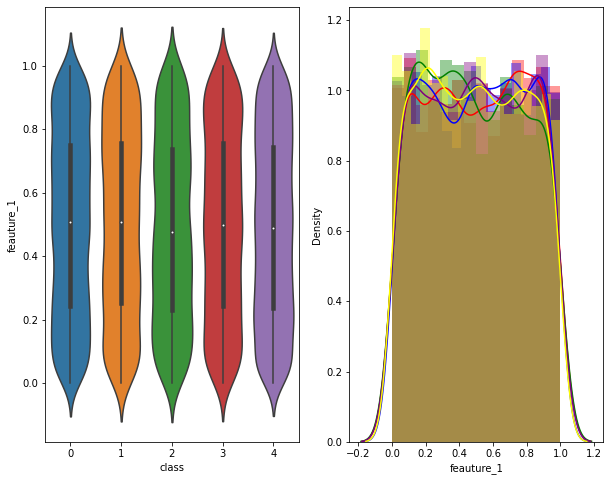

In [14]:
# Distribution of the feauture_1

plot_feuture(data,'feauture_1')

<b>Observations:</b>
<li>From above plot we can observe that feauture_1 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture2

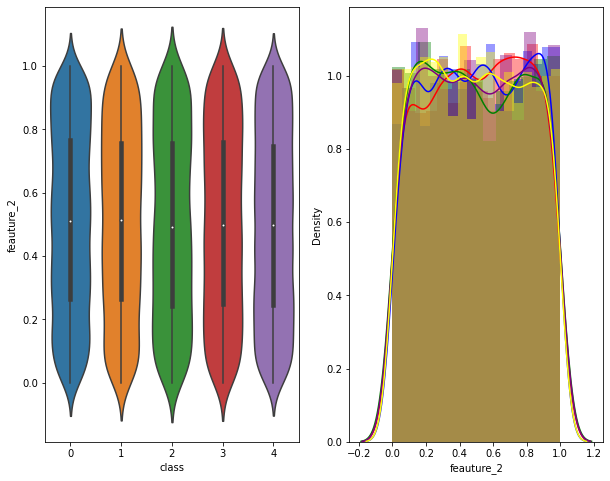

In [15]:
# Distribution of the feauture_2
plot_feuture(data,'feauture_2')

<b>Observations:</b>
<li>From above plot we can observe that feauture_2 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture3

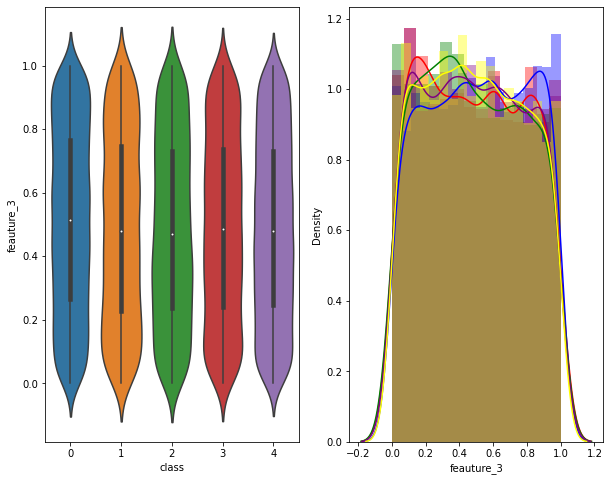

In [16]:
# Distribution of the feauture_3
plot_feuture(data,'feauture_3')

<b>Observations:</b>
<li>From above plot we can observe that feauture_3 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture4

In [18]:
data[['feauture_4']].describe()

,feauture_4
count,17995.000000
mean,499.892212
std,288.810797
min,1.760119
25%,250.648463
50%,495.869828
75%,748.580198
max,1008.672530


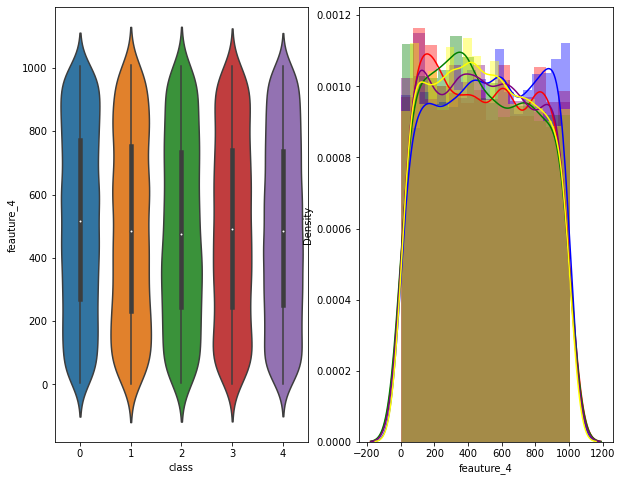

In [17]:
# Distribution of the feauture_4
plot_feuture(data,'feauture_4')

<b>Observations:</b>
<li>From above plot we can observe that feauture_4 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture5

In [19]:
data[['feauture_5']].describe()

,feauture_5
count,17998.000000
mean,0.503220
std,0.649628
min,0.000010
25%,0.252343
50%,0.496363
75%,0.745778
max,78.000000


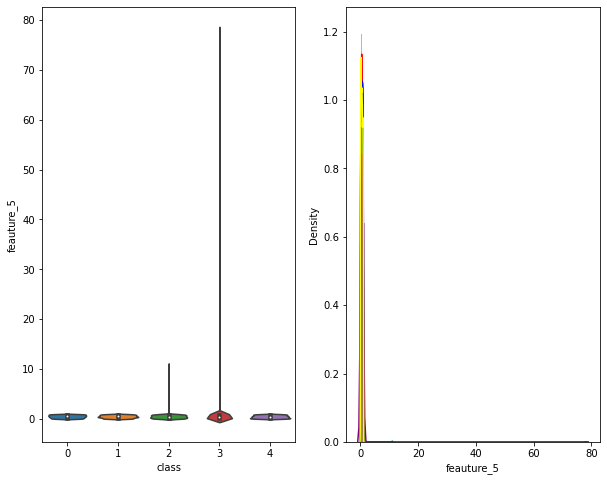

In [20]:
# Distribution of the feauture_5
plot_feuture(data,'feauture_5')

<b>Observations:</b>
<li>From above plot we can observe that feauture_5 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_5 which are present in class 2 and class 3</li>

## Feauture_6

In [21]:
data[['feauture_6']].describe()

,feauture_6
count,17998.000000
mean,0.502215
std,0.305166
min,0.000005
25%,0.251844
50%,0.502624
75%,0.751620
max,14.000000


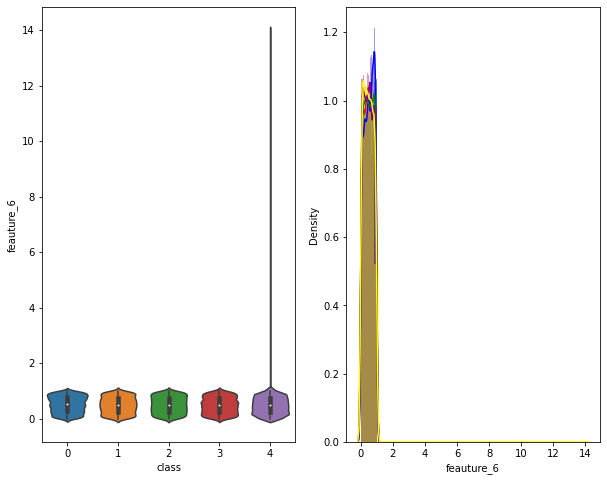

In [22]:
# Distribution of the feauture_6
plot_feuture(data,'feauture_6')

<b>Observations:</b>
<li>From above plot we can observe that feauture_6 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_6 which are present in class 4 </li>

## Feauture_7

In [23]:
data[['feauture_7']].describe()

,feauture_7
count,17999.000000
mean,0.504697
std,0.289100
min,0.000062
25%,0.252453
50%,0.506607
75%,0.757879
max,0.999948


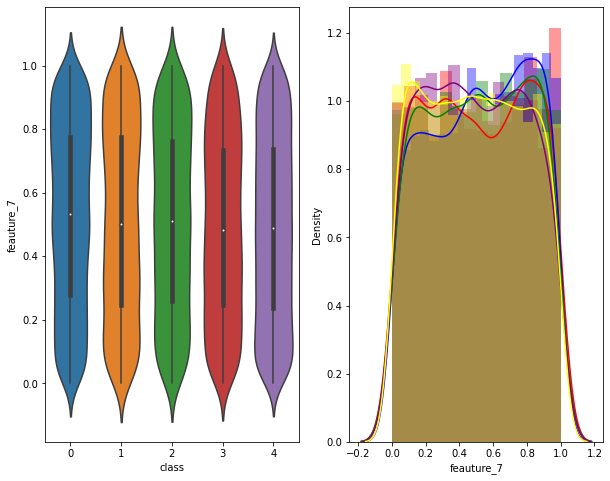

In [24]:
# Distribution of the feauture_7
plot_feuture(data,'feauture_7')

<b>Observations:</b>
<li>From above plot we can observe that feauture_7 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture_8

In [25]:
data[['feauture_8']].describe()

,feauture_8
count,17998.000000
mean,0.502609
std,0.287540
min,0.000006
25%,0.255681
50%,0.507720
75%,0.747877
max,0.999886


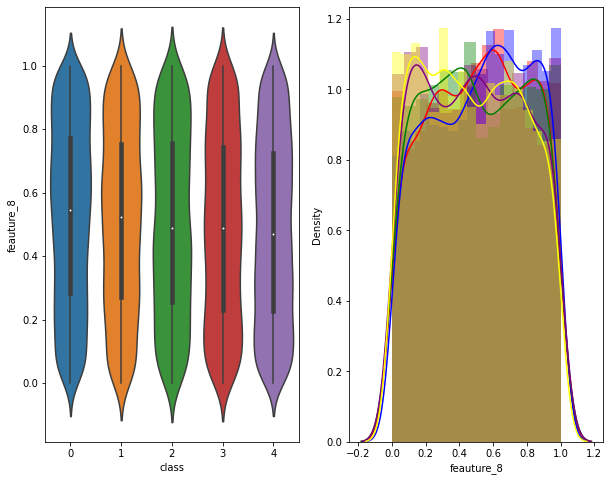

In [26]:
# Distribution of the feauture_8
plot_feuture(data,'feauture_8')

<b>Observations:</b>
<li>From above plot we can observe that feauture_8 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture_9

In [27]:
data[['feauture_9']].describe()

,feauture_9
count,17999.000000
mean,0.500514
std,0.326781
min,0.000028
25%,0.251511
50%,0.496498
75%,0.750601
max,21.000000


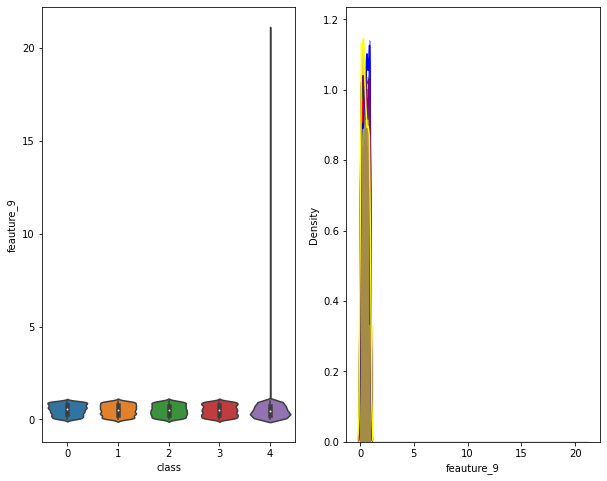

In [28]:
# Distribution of the feauture_9
plot_feuture(data,'feauture_9')

<b>Observations:</b>
<li>From above plot we can observe that feauture_9 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_9 which are present in class 4 </li> 

## Feauture_10

In [29]:
data[['feauture_10']].describe()

,feauture_10
count,17993.000000
mean,0.499124
std,0.567464
min,0.000012
25%,0.245572
50%,0.492539
75%,0.744947
max,66.000000


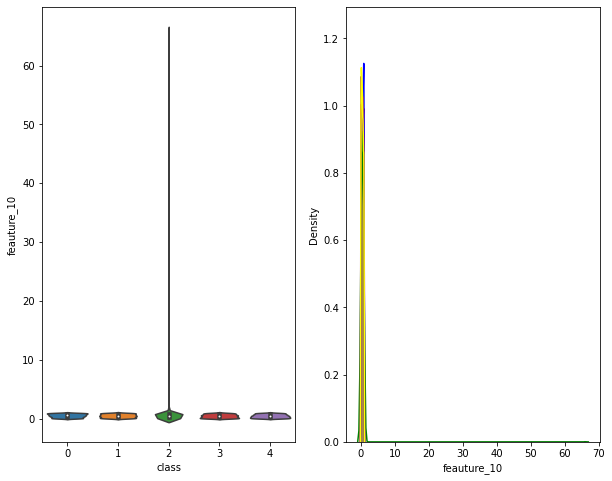

In [30]:
# Distribution of the feauture_10
plot_feuture(data,'feauture_10')

<b>Observations:</b>
<li>From above plot we can observe that feauture_10 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_10 which are present in class 2 </li> 

## Feauture_11

In [31]:
data[['feauture_11']].describe()

,feauture_11
count,17999.000000
mean,1.508357
std,0.548036
min,0.044788
25%,1.161385
50%,1.508393
75%,1.855896
max,32.000000


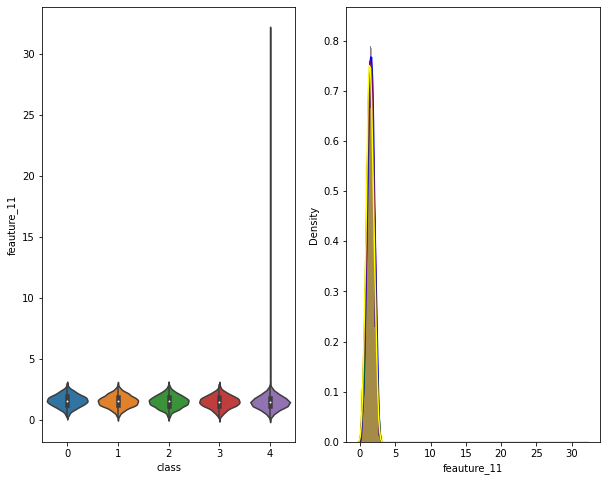

In [32]:
# Distribution of the feauture_11
plot_feuture(data,'feauture_11')

<b>Observations:</b>
<li>From above plot we can observe that feauture_11 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_11 which are present in class 4 </li> 

## Feauture_12

In [33]:
data[['feauture_12']].describe()

,feauture_12
count,17998.000000
mean,0.499226
std,0.288384
min,0.000048
25%,0.250073
50%,0.498618
75%,0.750113
max,0.999977


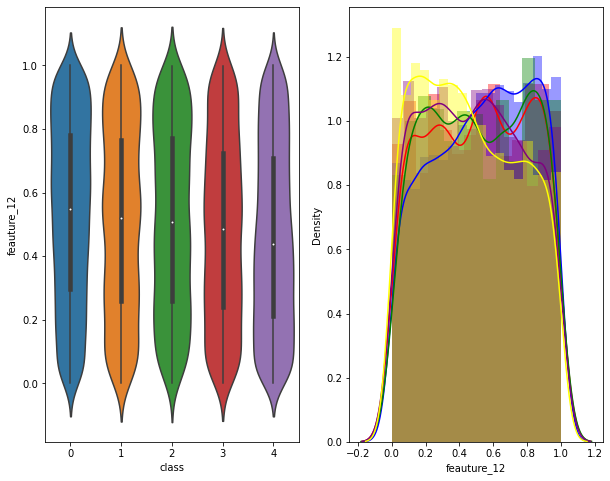

In [34]:
# Distribution of the feauture_12
plot_feuture(data,'feauture_12')

<b>Observations:</b>
<li>From above plot we can observe that feauture_12 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture_13

In [35]:
data[['feauture_13']].describe()

,feauture_13
count,17998.000000
mean,0.502312
std,0.505143
min,0.000025
25%,0.247147
50%,0.500788
75%,0.748099
max,56.000000


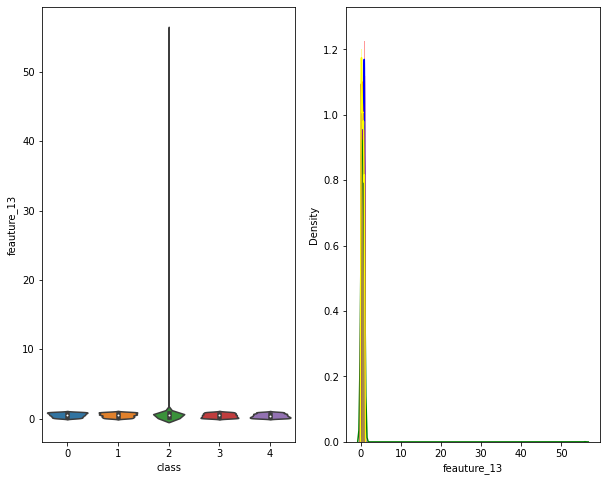

In [36]:
# Distribution of the feauture_13
plot_feuture(data,'feauture_13')

<b>Observations:</b>
<li>From above plot we can observe that feauture_13 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_13 which are present in class 2 </li> 

## Feauture_14

In [37]:
data[['feauture_14']].describe()

,feauture_14
count,17998.000000
mean,0.504859
std,0.330640
min,0.000225
25%,0.254543
50%,0.505512
75%,0.756945
max,22.000000


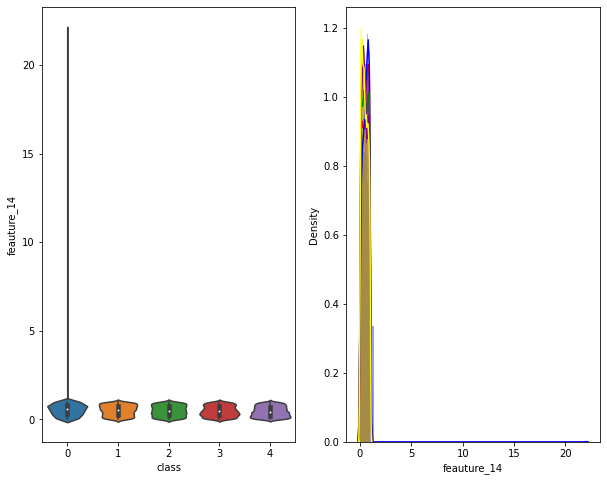

In [38]:
# Distribution of the feauture_14
plot_feuture(data,'feauture_14')

<b>Observations:</b>
<li>From above plot we can observe that feauture_14 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_14 which are present in class 0 </li> 

## Feauture_15

In [39]:
data[['feauture_15']].describe()

,feauture_15
count,17998.000000
mean,0.502717
std,0.289622
min,0.000022
25%,0.252762
50%,0.504251
75%,0.754394
max,0.999841


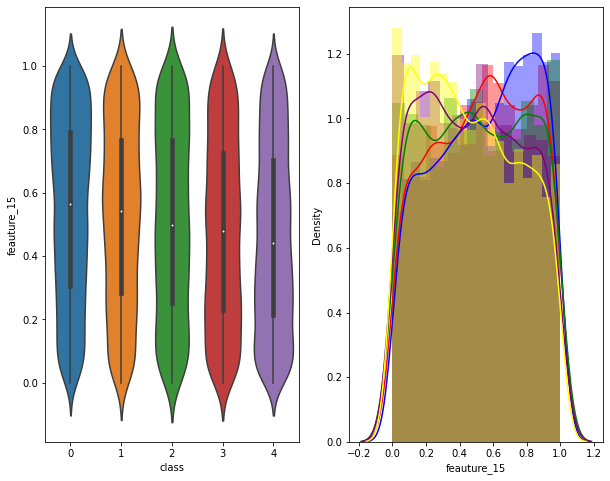

In [40]:
# Distribution of the feauture_15
plot_feuture(data,'feauture_15')

<b>Observations:</b>
<li>From above plot we can observe that feauture_15 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture_16

In [41]:
data[['feauture_16']].describe()

,feauture_16
count,17998.000000
mean,0.503588
std,0.340392
min,0.000055
25%,0.257830
50%,0.503299
75%,0.751388
max,25.000000


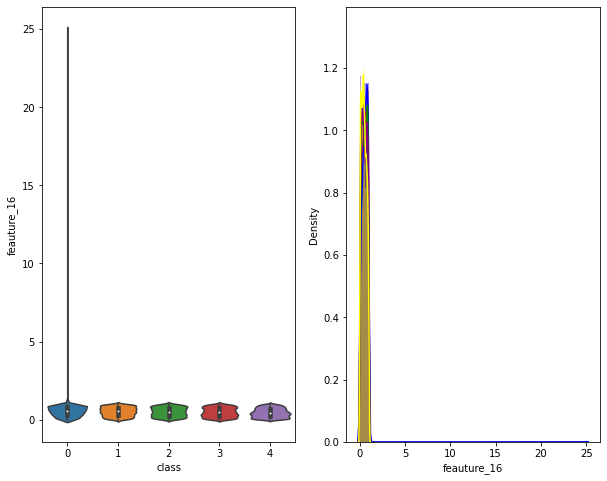

In [42]:
# Distribution of the feauture_16
plot_feuture(data,'feauture_16')

<b>Observations:</b>
<li>From above plot we can observe that feauture_16 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_16 which are present in class 0 </li>  

## Feauture_17

In [43]:
data[['feauture_17']].describe()

,feauture_17
count,18000.000000
mean,0.498201
std,0.288669
min,0.000010
25%,0.250541
50%,0.496259
75%,0.747675
max,0.999975


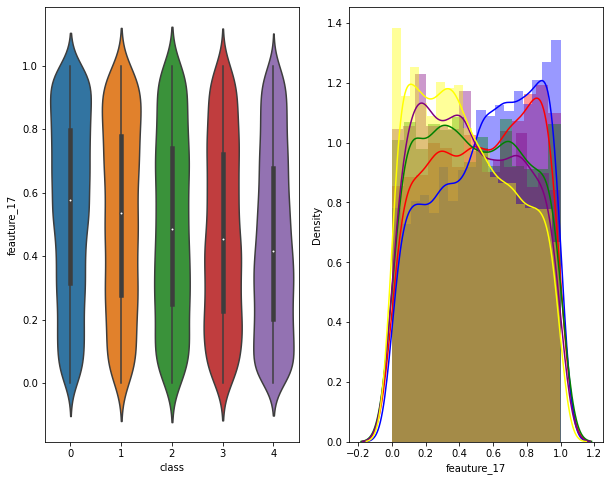

In [44]:
# Distribution of the feauture_17
plot_feuture(data,'feauture_17')

<b>Observations:</b>
<li>From above plot we can observe that feauture_17 is uniformly distributed and we cant differentiate target variable using this feauture</li>

## Feauture_18

In [45]:
data[['feauture_18']].describe()

,feauture_18
count,17996.000000
mean,0.495809
std,0.289641
min,0.000163
25%,0.243231
50%,0.492568
75%,0.746794
max,0.999742


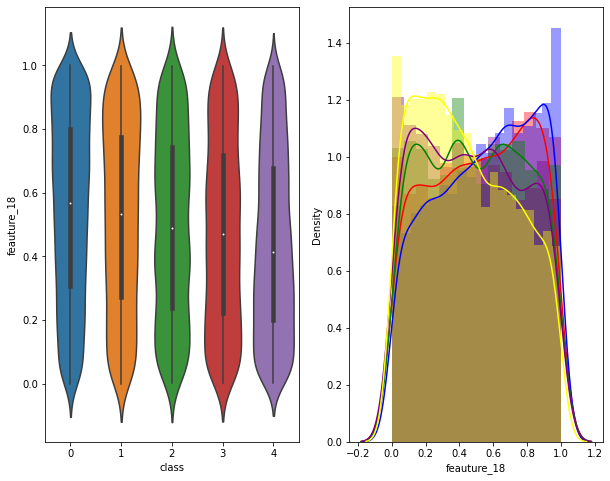

In [46]:
# Distribution of the feauture_18
plot_feuture(data,'feauture_18')

<b>Observations:</b>
<li>From above plot we can observe that feauture_18 is uniformly distributed </li>
<li>for class 4 25th percentile value is lesser compared to other classes</li>

## Feauture_19

In [47]:
data[['feauture_19']].describe()

,feauture_19
count,17998.000000
mean,0.502856
std,0.781075
min,0.000058
25%,0.251895
50%,0.498191
75%,0.743448
max,98.000000


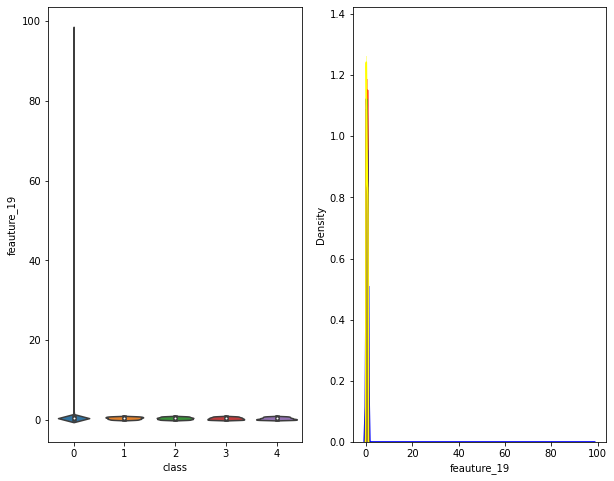

In [48]:
# Distribution of the feauture_19
plot_feuture(data,'feauture_19')

<b>Observations:</b>
<li>From above plot we can observe that feauture_19 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_19 which are present in class 0 </li>  

## Feauture_20

In [49]:
data[['feauture_20']].describe()

,feauture_20
count,17995.000000
mean,29.618674
std,21.792547
min,5.000000
25%,11.643962
50%,23.150175
75%,42.680962
max,104.947610


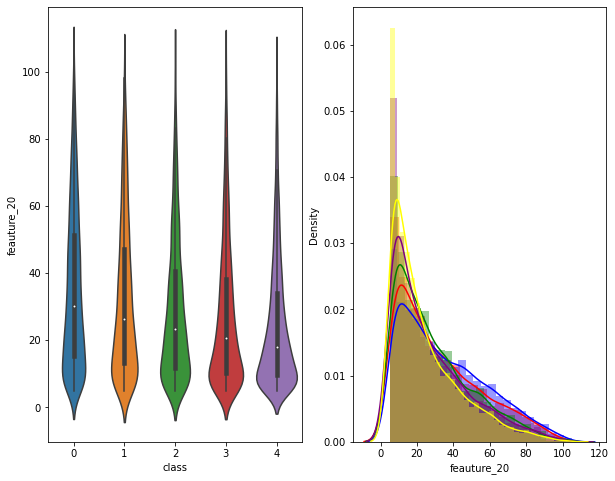

In [50]:
# Distribution of the feauture_20
plot_feuture(data,'feauture_20')

<b>Observations:</b>
<li>From above plot we can observe that feauture_20 distributions for all classes are highly overlapping</li>


## Feauture_21

In [51]:
data[['feauture_21']].describe()

,feauture_21
count,17999.000000
mean,0.502583
std,0.434148
min,0.000128
25%,0.248253
50%,0.500485
75%,0.751306
max,44.000000


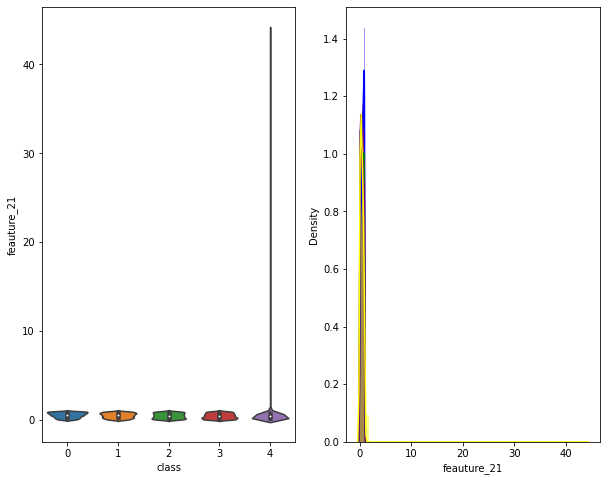

In [52]:
# Distribution of the feauture_21
plot_feuture(data,'feauture_21')

<b>Observations:</b>
<li>From above plot we can observe that feauture_21 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_21 which are present in class 4 </li>  

## Feauture_22 

In [53]:
data[['feauture_22']].describe()

,feauture_22
count,17997.000000
mean,0.502572
std,0.331018
min,0.000040
25%,0.250221
50%,0.504248
75%,0.753712
max,22.000000


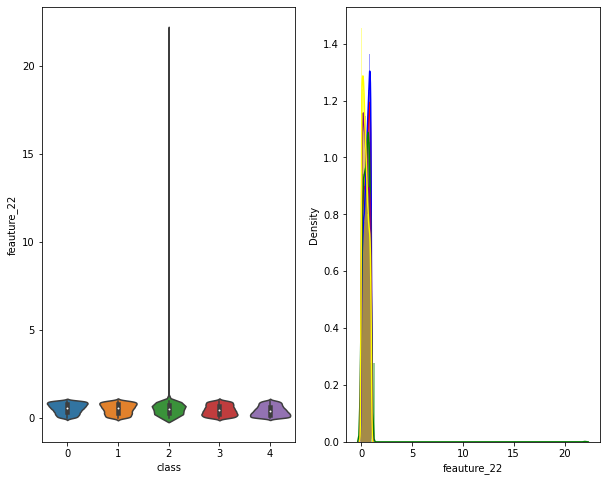

In [54]:
# Distribution of the feauture_22
plot_feuture(data,'feauture_22')

<b>Observations:</b>
<li>From above plot we can observe that feauture_22 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_22 which are present in class 2 </li>  

## Feauture_23

In [55]:
data[['feauture_23']].describe()

,feauture_23
count,17997.000000
mean,0.501805
std,0.287901
min,0.000025
25%,0.251955
50%,0.505243
75%,0.750784
max,0.999909


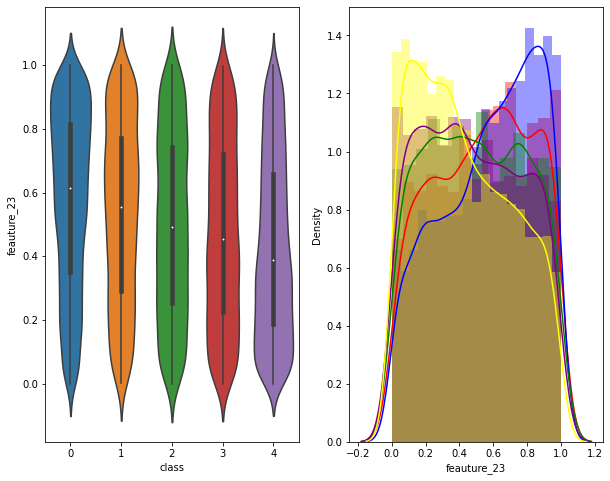

In [56]:
# Distribution of the feauture_23
plot_feuture(data,'feauture_23')

<b>Observations:</b>
<li>From above plot we can observe that feauture_23 is uniformly distributed </li>
<li>for class 4 25th percentile value is lesser compared to other classes</li>

## Feauture_24

In [57]:
data[['feauture_24']].describe()

,feauture_24
count,17998.000000
mean,0.498935
std,0.376369
min,0.000014
25%,0.246204
50%,0.496341
75%,0.745365
max,33.000000


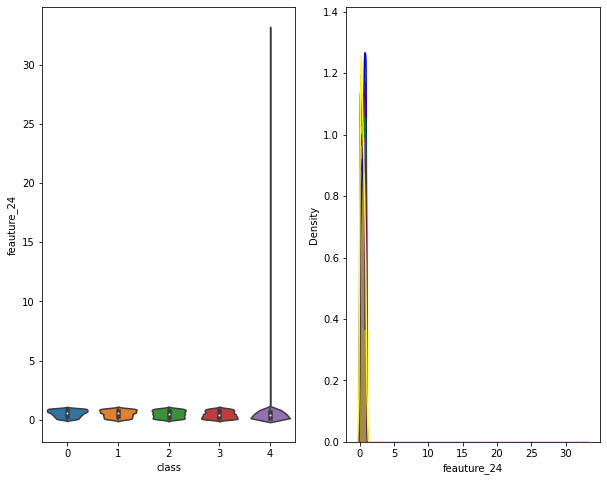

In [58]:
# Distribution of the feauture_24
plot_feuture(data,'feauture_24')

<b>Observations:</b>
<li>From above plot we can observe that feauture_24 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_24 which are present in class 4 </li>  

## feauture_25

In [59]:
data[['feauture_25']].describe()

,feauture_25
count,17996.000000
mean,0.497505
std,0.287846
min,0.000168
25%,0.250703
50%,0.496521
75%,0.743042
max,0.999900


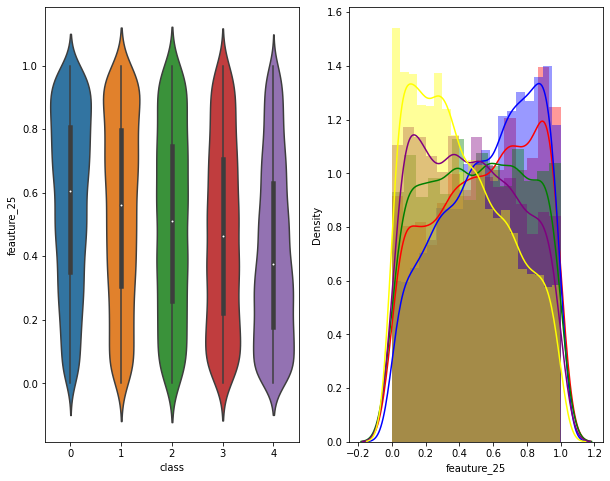

In [60]:
# Distribution of the feauture_25
plot_feuture(data,'feauture_25')

<b>Observations:</b>
<li>From above plot we can observe that feauture_25 is uniformly distributed </li>
<li>for class 4 25th percentile value is lesser compared to other classes</li>

## Feauture_26 

In [61]:
data[['feauture_26']].describe()

,feauture_26
count,17998.000000
mean,0.499214
std,0.288174
min,0.000021
25%,0.250295
50%,0.498162
75%,0.749331
max,0.999859


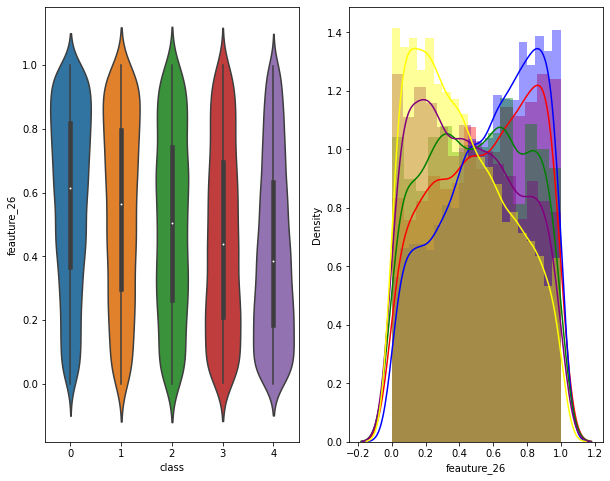

In [62]:
# Distribution of the feauture_26
plot_feuture(data,'feauture_26')

<b>Observations:</b>
<li>From above plot we can observe that feauture_26 is uniformly distributed </li>
<li>for class 4 25th percentile value is lesser compared to other classes</li> 
<li>distributions for all 5 classes are highly overlapping</li>

## Feauture_28

In [65]:
data[['feauture_28']].describe()

,feauture_28
count,17995.000000
mean,0.501101
std,0.401123
min,0.000010
25%,0.250837
50%,0.494534
75%,0.746832
max,33.000000


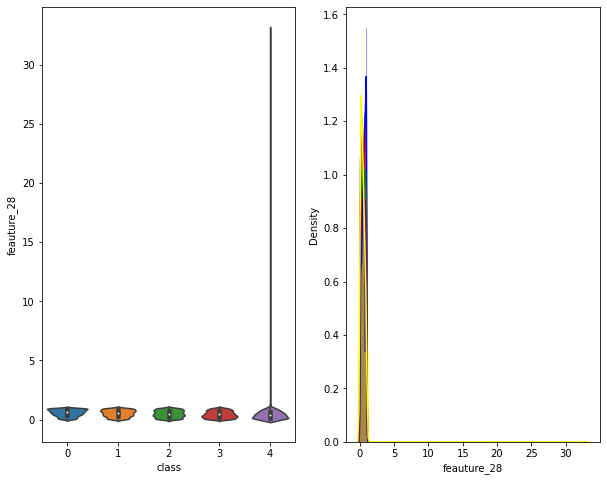

In [66]:
# Distribution of the feauture_28
plot_feuture(data,'feauture_28')

<b>Observations:</b>
<li>From above plot we can observe that feauture_28 is uniformly distributed and we cant differentiate target variable using this feauture</li>
<li>we can see there are outliers in feauture_28 which are present in class 4 </li>  

## Feauture_27

In [67]:
data[['feauture_27']].describe()

,feauture_27
count,17994
unique,4
top,Cold
freq,4538


<AxesSubplot:xlabel='feauture_27', ylabel='count'>

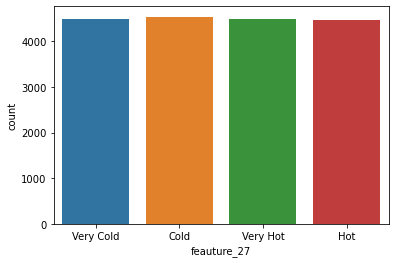

In [68]:
import seaborn as sns
sns.countplot(data=data,x='feauture_27')

## Removing null values and outliers from data

In [92]:
print("number of records where data is null is ",sum(data.isna().sum()))
print("percentage of records where data is null is ",(sum(data.isna().sum())/data.shape[0])*100)
data.isna().sum()

number of records where data is null is  75
percentage of records where data is null is  0.4166666666666667


feauture_1     0
feauture_2     1
feauture_3     0
feauture_4     5
feauture_5     2
feauture_6     2
feauture_7     1
feauture_8     2
feauture_9     1
feauture_10    7
feauture_11    1
feauture_12    2
feauture_13    2
feauture_14    2
feauture_15    2
feauture_16    2
feauture_17    0
feauture_18    4
feauture_19    2
feauture_20    5
feauture_21    1
feauture_22    3
feauture_23    3
feauture_24    2
feauture_25    4
feauture_26    2
feauture_27    6
feauture_28    5
feauture_29    6
class          0
dtype: int64

<b>as null values are only 0.4% of whole data we can remove that data</b>

In [93]:
print("shape of data before removing null values is ", data.shape)
data=data.dropna()
print("shape of data after removing null values is ", data.shape)

shape of data before removing null values is  (18000, 30)
shape of data after removing null values is  (17930, 30)


<h5>removing outliers wrt feauture_5<h5>

In [98]:
data[['feauture_5']].describe()
np.percentile()

,feauture_5
count,17930.000000
mean,0.502924
std,0.650601
min,0.000010
25%,0.251793
50%,0.495894
75%,0.745342
max,78.000000


In [108]:
for i in range(11):
    print(90+i," percentile value is ",np.percentile(data['feauture_5'],90+i))
print("=========================================================================")
for i in range(11):
    print(99+i/10," percentile value is ",np.percentile(data['feauture_5'],99+i/10))
# np.percentile(data['feauture_5'],99.1)

90  percentile value is  0.8947058481
91  percentile value is  0.9066194748000003
92  percentile value is  0.9167636811600001
93  percentile value is  0.92673634622
94  percentile value is  0.93780957938
95  percentile value is  0.9480113565
96  percentile value is  0.95910036184
97  percentile value is  0.96941220781
98  percentile value is  0.9793523341599998
99  percentile value is  0.9899790582599999
100  percentile value is  78.0
99.0  percentile value is  0.9899790582599999
99.1  percentile value is  0.9913703377609999
99.2  percentile value is  0.9920608833119999
99.3  percentile value is  0.993127348794
99.4  percentile value is  0.9941585059240002
99.5  percentile value is  0.995199771915
99.6  percentile value is  0.995975779424
99.7  percentile value is  0.99728895381
99.8  percentile value is  0.9980071747479999
99.9  percentile value is  0.9991529734430001
100.0  percentile value is  78.0


we can observe that 99.9 percentile values have lower values only but 100th percentile value is very high.so filter out records where value is greater than 1.0 

In [110]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_5']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17930, 30)
shape of data after removing outliers is (17928, 30)


<h5>removing outliers wrt feauture_6</h5>

In [111]:
data[['feauture_6']].describe()

,feauture_6
count,17928.000000
mean,0.502271
std,0.305256
min,0.000005
25%,0.251759
50%,0.502583
75%,0.751888
max,14.000000


In [112]:
for i in range(11):
    print(90+i," percentile value is ",np.percentile(data['feauture_6'],90+i))
print("=========================================================================")
for i in range(11):
    print(99+i/10," percentile value is ",np.percentile(data['feauture_6'],99+i/10))
# np.percentile(data['feauture_5'],99.1)

90  percentile value is  0.8973585585
91  percentile value is  0.90721347237
92  percentile value is  0.91780079264
93  percentile value is  0.9276505054099999
94  percentile value is  0.9378149105999999
95  percentile value is  0.9486306963499997
96  percentile value is  0.96044543152
97  percentile value is  0.9698905971
98  percentile value is  0.9794239376399999
99  percentile value is  0.98979516774
100  percentile value is  14.0
99.0  percentile value is  0.98979516774
99.1  percentile value is  0.990457323373
99.2  percentile value is  0.991877821512
99.3  percentile value is  0.992940667059
99.4  percentile value is  0.994188187028
99.5  percentile value is  0.9955064881400001
99.6  percentile value is  0.9963037812840002
99.7  percentile value is  0.9971037893660001
99.8  percentile value is  0.99816894244
99.9  percentile value is  0.998985113041
100.0  percentile value is  14.0


In [114]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_6']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17928, 30)
shape of data after removing outliers is (17927, 30)


In [117]:
# data[['feauture_7']].describe()

def get_outliers(data,column):
    print(data[[column]].describe())
    print("==============================================")
    for i in range(11):
        print(90+i," percentile value is ",np.percentile(data[column],90+i))
    print("=========================================================================")
    for i in range(11):
        print(99+i/10," percentile value is ",np.percentile(data[column],99+i/10))
        


<h5>removing outliers wrt feauture_7</h5>

In [118]:
get_outliers(data,'feauture_7')

         feauture_7
count  17927.000000
mean       0.504666
std        0.289209
min        0.000062
25%        0.252272
50%        0.506469
75%        0.758080
max        0.999948
90  percentile value is  0.9011844128
91  percentile value is  0.9114074632
92  percentile value is  0.9208519193600001
93  percentile value is  0.92984273488
94  percentile value is  0.9402949748
95  percentile value is  0.950188559
96  percentile value is  0.96070364468
97  percentile value is  0.97097673882
98  percentile value is  0.97983419772
99  percentile value is  0.9900315480800003
100  percentile value is  0.99994813
99.0  percentile value is  0.9900315480800003
99.1  percentile value is  0.990817049816
99.2  percentile value is  0.9918119773680001
99.3  percentile value is  0.992646952902
99.4  percentile value is  0.993530309812
99.5  percentile value is  0.9945003227299999
99.6  percentile value is  0.99606317876
99.7  percentile value is  0.996931748558
99.8  percentile value is  0.99807873794


we can observe from above result that we dont have any outliers

<h5>removing outliers wrt feauture_8</h5>

In [119]:
get_outliers(data,'feauture_8')

         feauture_8
count  17927.000000
mean       0.502970
std        0.287544
min        0.000006
25%        0.256251
50%        0.508264
75%        0.748269
max        0.999886
90  percentile value is  0.8996452776
91  percentile value is  0.9107160493600001
92  percentile value is  0.9210081334
93  percentile value is  0.93146221216
94  percentile value is  0.94155537516
95  percentile value is  0.9503625029
96  percentile value is  0.9612349633199999
97  percentile value is  0.97118114828
98  percentile value is  0.98064846628
99  percentile value is  0.9896455710000004
100  percentile value is  0.999885862
99.0  percentile value is  0.9896455710000004
99.1  percentile value is  0.9910300570320001
99.2  percentile value is  0.991798605248
99.3  percentile value is  0.99268125759
99.4  percentile value is  0.993534727744
99.5  percentile value is  0.9946280853099999
99.6  percentile value is  0.9959869202079998
99.7  percentile value is  0.9970414111860001
99.8  percentile value is

we can observe from above result that we dont have any outliers

<h5>removing outliers wrt feauture_9</h5>

In [120]:
get_outliers(data,'feauture_9')

         feauture_9
count  17927.000000
mean       0.500288
std        0.326956
min        0.000028
25%        0.251318
50%        0.496134
75%        0.750409
max       21.000000
90  percentile value is  0.9006783939999999
91  percentile value is  0.91019666398
92  percentile value is  0.919809813
93  percentile value is  0.92914632088
94  percentile value is  0.9406531532
95  percentile value is  0.950571626
96  percentile value is  0.9592058622799999
97  percentile value is  0.9691334419600001
98  percentile value is  0.979701293
99  percentile value is  0.9898185969200001
100  percentile value is  21.0
99.0  percentile value is  0.9898185969200001
99.1  percentile value is  0.9906410896460001
99.2  percentile value is  0.991457281744
99.3  percentile value is  0.992510617158
99.4  percentile value is  0.9937470095040001
99.5  percentile value is  0.9946933944199999
99.6  percentile value is  0.9955879601359999
99.7  percentile value is  0.9963934314020002
99.8  percentile value is 

In [121]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_9']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17927, 30)
shape of data after removing outliers is (17926, 30)


<h5>removing outliers wrt feauture_10</h5>

In [122]:
get_outliers(data,'feauture_10')

        feauture_10
count  17926.000000
mean       0.499220
std        0.568298
min        0.000012
25%        0.245497
50%        0.492744
75%        0.745178
max       66.000000
90  percentile value is  0.89958179
91  percentile value is  0.91057977925
92  percentile value is  0.92009471
93  percentile value is  0.9303877312500001
94  percentile value is  0.940078594
95  percentile value is  0.9500805222500001
96  percentile value is  0.96056181
97  percentile value is  0.9705924215
98  percentile value is  0.980847731
99  percentile value is  0.99020530275
100  percentile value is  66.0
99.0  percentile value is  0.99020530275
99.1  percentile value is  0.99143485015
99.2  percentile value is  0.9924828734
99.3  percentile value is  0.993264597925
99.4  percentile value is  0.9941802045
99.5  percentile value is  0.9947760571250001
99.6  percentile value is  0.9955868006999999
99.7  percentile value is  0.9968196707499999
99.8  percentile value is  0.9974371018000001
99.9  percentil

In [123]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_10']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17926, 30)
shape of data after removing outliers is (17925, 30)


<h5>removing outliers wrt feauture_11</h5> 

In [124]:
get_outliers(data,'feauture_11')

        feauture_11
count  17925.000000
mean       1.508426
std        0.548198
min        0.044788
25%        1.162102
50%        1.508484
75%        1.856099
max       32.000000
90  percentile value is  2.1637144534
91  percentile value is  2.19308260416
92  percentile value is  2.22555095776
93  percentile value is  2.26284929828
94  percentile value is  2.29257640632
95  percentile value is  2.3308295306
96  percentile value is  2.37209062996
97  percentile value is  2.4357816301199997
98  percentile value is  2.5019919318
99  percentile value is  2.617436156199995
100  percentile value is  32.0
99.0  percentile value is  2.617436156199995
99.1  percentile value is  2.629972515620001
99.2  percentile value is  2.64176201328
99.3  percentile value is  2.659566685471999
99.4  percentile value is  2.6830615013760006
99.5  percentile value is  2.7059151736800016
99.6  percentile value is  2.723802718016
99.7  percentile value is  2.7473590758159987
99.8  percentile value is  2.78601031

In [128]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_11']<=3.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17925, 30)
shape of data after removing outliers is (17924, 30)


<h5>removing outliers wrt feauture_12</h5> 

In [129]:
get_outliers(data,'feauture_12')

        feauture_12
count  17924.000000
mean       0.498916
std        0.288494
min        0.000048
25%        0.249631
50%        0.498013
75%        0.750096
max        0.999977
90  percentile value is  0.8995883315000001
91  percentile value is  0.9109380303
92  percentile value is  0.9199688494
93  percentile value is  0.9305848705599999
94  percentile value is  0.9396220390799997
95  percentile value is  0.9499804643
96  percentile value is  0.96003224664
97  percentile value is  0.9702944522400001
98  percentile value is  0.9807507469400001
99  percentile value is  0.98957583873
100  percentile value is  0.99997686
99.0  percentile value is  0.98957583873
99.1  percentile value is  0.990911699132
99.2  percentile value is  0.9920952408639999
99.3  percentile value is  0.993206637521
99.4  percentile value is  0.9940240763000001
99.5  percentile value is  0.99488700378
99.6  percentile value is  0.996175267212
99.7  percentile value is  0.99707749782
99.8  percentile value is  0.9

no outliers for above feauture

<h5>removing outliers wrt feauture_13</h5> 

In [130]:
get_outliers(data,'feauture_13')

        feauture_13
count  17924.000000
mean       0.502317
std        0.505845
min        0.000025
25%        0.246992
50%        0.500721
75%        0.747980
max       56.000000
90  percentile value is  0.9016807806
91  percentile value is  0.91022133016
92  percentile value is  0.92151302524
93  percentile value is  0.93166404238
94  percentile value is  0.94252837066
95  percentile value is  0.9514159654
96  percentile value is  0.96065742248
97  percentile value is  0.97040732053
98  percentile value is  0.9801191721
99  percentile value is  0.99033408271
100  percentile value is  56.0
99.0  percentile value is  0.99033408271
99.1  percentile value is  0.9912776805779999
99.2  percentile value is  0.9921788939839999
99.3  percentile value is  0.993011317711
99.4  percentile value is  0.99409373017
99.5  percentile value is  0.9949159842199998
99.6  percentile value is  0.996474098796
99.7  percentile value is  0.997250752787
99.8  percentile value is  0.998051681292
99.9  percenti

In [134]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_13']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17924, 30)
shape of data after removing outliers is (17923, 30)


<h5>removing outliers wrt feauture_14</h5>  

In [135]:
get_outliers(data,'feauture_14')

        feauture_14
count  17923.000000
mean       0.504825
std        0.330775
min        0.000225
25%        0.254408
50%        0.505660
75%        0.756811
max       22.000000
90  percentile value is  0.9019607264000001
91  percentile value is  0.9126392007799999
92  percentile value is  0.92223836692
93  percentile value is  0.9322530542999999
94  percentile value is  0.94081606912
95  percentile value is  0.9512179514999998
96  percentile value is  0.9591495602000001
97  percentile value is  0.9700853604
98  percentile value is  0.9806661872800001
99  percentile value is  0.9901953579
100  percentile value is  22.0
99.0  percentile value is  0.9901953579
99.1  percentile value is  0.990968131702
99.2  percentile value is  0.9921587143839999
99.3  percentile value is  0.9932842343259998
99.4  percentile value is  0.9943659030800001
99.5  percentile value is  0.99533803538
99.6  percentile value is  0.996447844544
99.7  percentile value is  0.9976834992
99.8  percentile value is  0

In [140]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_14']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17923, 30)
shape of data after removing outliers is (17922, 30)


<h5>removing outliers wrt feauture_15</h5>  

In [141]:
get_outliers(data,'feauture_15')

        feauture_15
count  17922.000000
mean       0.503138
std        0.289502
min        0.000022
25%        0.253594
50%        0.504531
75%        0.754694
max        0.999841
90  percentile value is  0.9031233185
91  percentile value is  0.91294884328
92  percentile value is  0.92223117372
93  percentile value is  0.9327358488
94  percentile value is  0.9424619334
95  percentile value is  0.95267832
96  percentile value is  0.96241308572
97  percentile value is  0.9722513373299999
98  percentile value is  0.98165970678
99  percentile value is  0.99089269515
100  percentile value is  0.999840983
99.0  percentile value is  0.99089269515
99.1  percentile value is  0.9916061423179999
99.2  percentile value is  0.9929276090880002
99.3  percentile value is  0.993574826534
99.4  percentile value is  0.9947267771580002
99.5  percentile value is  0.995740556985
99.6  percentile value is  0.996511104112
99.7  percentile value is  0.9973568998700001
99.8  percentile value is  0.998153621544


no outliers for above feauture

<h5>removing outliers wrt feauture_16</h5>  

In [142]:
get_outliers(data,'feauture_16')

        feauture_16
count  17922.000000
mean       0.503544
std        0.340572
min        0.000055
25%        0.257547
50%        0.503157
75%        0.751313
max       25.000000
90  percentile value is  0.8968469377999999
91  percentile value is  0.90831114909
92  percentile value is  0.91855986924
93  percentile value is  0.9295608068100002
94  percentile value is  0.9394313374599997
95  percentile value is  0.9506598308
96  percentile value is  0.9612758927199999
97  percentile value is  0.97174427785
98  percentile value is  0.9808975939799996
99  percentile value is  0.9910171412500001
100  percentile value is  25.0
99.0  percentile value is  0.9910171412500001
99.1  percentile value is  0.9919602690839999
99.2  percentile value is  0.99273447284
99.3  percentile value is  0.9934014132260001
99.4  percentile value is  0.99463361623
99.5  percentile value is  0.99575306864
99.6  percentile value is  0.9962087117639999
99.7  percentile value is  0.997069026087
99.8  percentile valu

In [146]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_16']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17922, 30)
shape of data after removing outliers is (17921, 30)


<h5>removing outliers wrt feauture_17</h5>  

In [147]:
get_outliers(data,'feauture_17')

        feauture_17
count  17921.000000
mean       0.498337
std        0.288747
min        0.000010
25%        0.250290
50%        0.496432
75%        0.747873
max        0.999975
90  percentile value is  0.899499092
91  percentile value is  0.9103111078
92  percentile value is  0.9198178896000002
93  percentile value is  0.9304767836000001
94  percentile value is  0.9398255748000001
95  percentile value is  0.949010046
96  percentile value is  0.9592878054
97  percentile value is  0.9697130794
98  percentile value is  0.980493049
99  percentile value is  0.9910501504
100  percentile value is  0.999974824
99.0  percentile value is  0.9910501504
99.1  percentile value is  0.9919948726000001
99.2  percentile value is  0.99322421188
99.3  percentile value is  0.99410626332
99.4  percentile value is  0.9952998546400005
99.5  percentile value is  0.9959964462
99.6  percentile value is  0.99699829048
99.7  percentile value is  0.9977985581600001
99.8  percentile value is  0.99843904724
99.9 

no outliers for above feauture 

<h5>removing outliers wrt feauture_18</h5>  

In [148]:
get_outliers(data,'feauture_18')

        feauture_18
count  17921.000000
mean       0.495792
std        0.289565
min        0.000163
25%        0.243350
50%        0.492505
75%        0.746791
max        0.999742
90  percentile value is  0.90030877
91  percentile value is  0.9103725488
92  percentile value is  0.9204568272000001
93  percentile value is  0.9310451474000001
94  percentile value is  0.9404666448
95  percentile value is  0.950860211
96  percentile value is  0.959609712
97  percentile value is  0.9692131019999999
98  percentile value is  0.9799622803999999
99  percentile value is  0.9902267732
100  percentile value is  0.99974193
99.0  percentile value is  0.9902267732
99.1  percentile value is  0.99105909372
99.2  percentile value is  0.9918789064
99.3  percentile value is  0.9926873242
99.4  percentile value is  0.9939583831200001
99.5  percentile value is  0.9946895882
99.6  percentile value is  0.99566601216
99.7  percentile value is  0.9967093636400001
99.8  percentile value is  0.99782129552
99.9  pe

no outliers for above feauture 

<h5>removing outliers wrt feauture_19</h5>  

In [149]:
get_outliers(data,'feauture_19')

        feauture_19
count  17921.000000
mean       0.502918
std        0.782457
min        0.000058
25%        0.252146
50%        0.498288
75%        0.743312
max       98.000000
90  percentile value is  0.895302951
91  percentile value is  0.9041624552
92  percentile value is  0.9158589888
93  percentile value is  0.9257278862000001
94  percentile value is  0.9359519655999999
95  percentile value is  0.947987887
96  percentile value is  0.958428661
97  percentile value is  0.9691271717999999
98  percentile value is  0.9791153228
99  percentile value is  0.990370532
100  percentile value is  98.0
99.0  percentile value is  0.990370532
99.1  percentile value is  0.99105308116
99.2  percentile value is  0.9919624278799999
99.3  percentile value is  0.9927773214800001
99.4  percentile value is  0.9937072839600002
99.5  percentile value is  0.9946271894000001
99.6  percentile value is  0.9959939436399999
99.7  percentile value is  0.99709701328
99.8  percentile value is  0.99822513952
99.

In [152]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_19']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17921, 30)
shape of data after removing outliers is (17920, 30)


<h5>removing outliers wrt feauture_20</h5>  

In [153]:
get_outliers(data,'feauture_20')

        feauture_20
count  17920.000000
mean      29.623407
std       21.776268
min        5.000000
25%       11.658424
50%       23.190750
75%       42.679382
max      104.947610
90  percentile value is  62.81186831400002
91  percentile value is  64.5658631558
92  percentile value is  66.7080677872
93  percentile value is  68.98043730420002
94  percentile value is  71.38990339560003
95  percentile value is  74.11539285349998
96  percentile value is  76.9291921124
97  percentile value is  80.619453639
98  percentile value is  84.78152743999993
99  percentile value is  90.33632287400003
100  percentile value is  104.9476103
99.0  percentile value is  90.33632287400003
99.1  percentile value is  91.22138861191
99.2  percentile value is  91.9613970892001
99.3  percentile value is  92.60889242322986
99.4  percentile value is  93.88046898964006
99.5  percentile value is  94.7437984966499
99.6  percentile value is  96.14138439316
99.7  percentile value is  98.02639659456993
99.8  percentile 

no outliers in this data

<h5>removing outliers wrt feauture_21</h5>  

In [155]:
get_outliers(data,'feauture_21')

        feauture_21
count  17920.000000
mean       0.502645
std        0.434706
min        0.000128
25%        0.248410
50%        0.500662
75%        0.751317
max       44.000000
90  percentile value is  0.9000205379
91  percentile value is  0.9111641410000001
92  percentile value is  0.9205986052399999
93  percentile value is  0.93015380532
94  percentile value is  0.9400219683400001
95  percentile value is  0.9510126691999998
96  percentile value is  0.9599885136399998
97  percentile value is  0.97084956991
98  percentile value is  0.98038292316
99  percentile value is  0.9894927421200003
100  percentile value is  44.0
99.0  percentile value is  0.9894927421200003
99.1  percentile value is  0.9907158251379998
99.2  percentile value is  0.9917865032400003
99.3  percentile value is  0.9927005608299999
99.4  percentile value is  0.993750527846
99.5  percentile value is  0.995007309955
99.6  percentile value is  0.995856335036
99.7  percentile value is  0.997156334738
99.8  percentile v

In [159]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_21']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17920, 30)
shape of data after removing outliers is (17919, 30)


<h5>removing outliers wrt feauture_22</h5>  

In [160]:
get_outliers(data,'feauture_22')

        feauture_22
count  17919.000000
mean       0.502369
std        0.331247
min        0.000040
25%        0.249953
50%        0.503970
75%        0.753499
max       22.000000
90  percentile value is  0.8998773456000001
91  percentile value is  0.9103141425200001
92  percentile value is  0.92077032
93  percentile value is  0.9316093176400002
94  percentile value is  0.9420889584399998
95  percentile value is  0.9517528689
96  percentile value is  0.9607327043599998
97  percentile value is  0.9708598695599999
98  percentile value is  0.98126867812
99  percentile value is  0.99012438068
100  percentile value is  22.0
99.0  percentile value is  0.99012438068
99.1  percentile value is  0.9909382369
99.2  percentile value is  0.991852364928
99.3  percentile value is  0.9927632615140001
99.4  percentile value is  0.993584371244
99.5  percentile value is  0.99468919761
99.6  percentile value is  0.9957388986240001
99.7  percentile value is  0.99684094122
99.8  percentile value is  0.99805

In [163]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_22']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17919, 30)
shape of data after removing outliers is (17918, 30)


<h5>removing outliers wrt feauture_23</h5>  

In [164]:
get_outliers(data,'feauture_23')

        feauture_23
count  17918.000000
mean       0.501603
std        0.287853
min        0.000025
25%        0.251632
50%        0.505147
75%        0.750321
max        0.999909
90  percentile value is  0.8986494938
91  percentile value is  0.9086713092900001
92  percentile value is  0.9184141065599999
93  percentile value is  0.9278135931400001
94  percentile value is  0.93805408668
95  percentile value is  0.9479457567499999
96  percentile value is  0.95845846732
97  percentile value is  0.96830081101
98  percentile value is  0.97806158414
99  percentile value is  0.9891062407999998
100  percentile value is  0.999908657
99.0  percentile value is  0.9891062407999998
99.1  percentile value is  0.9901281902089999
99.2  percentile value is  0.9912799113600002
99.3  percentile value is  0.9925879356259997
99.4  percentile value is  0.9936007565080001
99.5  percentile value is  0.9947178318550001
99.6  percentile value is  0.9957084282159997
99.7  percentile value is  0.997210735666
99.8

no outliers observed

<h5>removing outliers wrt feauture_24</h5>   

In [165]:
get_outliers(data,'feauture_24')

        feauture_24
count  17918.000000
mean       0.498866
std        0.376616
min        0.000014
25%        0.246281
50%        0.496341
75%        0.744880
max       33.000000
90  percentile value is  0.8961483672
91  percentile value is  0.9056469447400001
92  percentile value is  0.91547581108
93  percentile value is  0.92581374916
94  percentile value is  0.9367946580600001
95  percentile value is  0.9476328197999999
96  percentile value is  0.95793604656
97  percentile value is  0.9682834629299999
98  percentile value is  0.97806403924
99  percentile value is  0.9887913710499999
100  percentile value is  33.0
99.0  percentile value is  0.9887913710499999
99.1  percentile value is  0.989997390109
99.2  percentile value is  0.991593991784
99.3  percentile value is  0.9927820090869999
99.4  percentile value is  0.993659706918
99.5  percentile value is  0.99474264941
99.6  percentile value is  0.99557942244
99.7  percentile value is  0.996495713312
99.8  percentile value is  0.9976

In [168]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_24']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17918, 30)
shape of data after removing outliers is (17917, 30)


<h5>removing outliers wrt feauture_25</h5>   

In [169]:
get_outliers(data,'feauture_25')

        feauture_25
count  17917.000000
mean       0.497438
std        0.287869
min        0.000168
25%        0.250580
50%        0.496468
75%        0.743194
max        0.999900
90  percentile value is  0.897995612
91  percentile value is  0.90757608424
92  percentile value is  0.9175428704
93  percentile value is  0.92690966424
94  percentile value is  0.9363258015199999
95  percentile value is  0.9479174076
96  percentile value is  0.9578247544399999
97  percentile value is  0.9676742456
98  percentile value is  0.9786927270000001
99  percentile value is  0.98961310932
100  percentile value is  0.999900014
99.0  percentile value is  0.98961310932
99.1  percentile value is  0.9906036286920001
99.2  percentile value is  0.991827886368
99.3  percentile value is  0.992863657684
99.4  percentile value is  0.9938529941840001
99.5  percentile value is  0.99478649234
99.6  percentile value is  0.9954425194319999
99.7  percentile value is  0.996498496508
99.8  percentile value is  0.9977953

no outliers present in above data

<h5>removing outliers wrt feauture_26</h5>   

In [170]:
get_outliers(data,'feauture_26')

        feauture_26
count  17917.000000
mean       0.499236
std        0.288112
min        0.000021
25%        0.250343
50%        0.498356
75%        0.749250
max        0.999859
90  percentile value is  0.8966300984
91  percentile value is  0.9067750776400001
92  percentile value is  0.917469677
93  percentile value is  0.9282181393200002
94  percentile value is  0.94022238512
95  percentile value is  0.9496151274
96  percentile value is  0.95975335532
97  percentile value is  0.97119799204
98  percentile value is  0.9807092314800001
99  percentile value is  0.9905483189600001
100  percentile value is  0.999858588
99.0  percentile value is  0.9905483189600001
99.1  percentile value is  0.9915242462880001
99.2  percentile value is  0.9925649376719998
99.3  percentile value is  0.993419102424
99.4  percentile value is  0.994579446168
99.5  percentile value is  0.9951175177799999
99.6  percentile value is  0.9960344795839999
99.7  percentile value is  0.9968407633520001
99.8  percentile

no outliers present in above data feauture

<h5>removing outliers wrt feauture_28</h5>   

In [172]:
get_outliers(data,'feauture_28')

        feauture_28
count  17917.000000
mean       0.501123
std        0.401596
min        0.000010
25%        0.250805
50%        0.494609
75%        0.746798
max       33.000000
90  percentile value is  0.9020100421999999
91  percentile value is  0.9112905414000001
92  percentile value is  0.9217894886400001
93  percentile value is  0.9319167768800001
94  percentile value is  0.9424189817199997
95  percentile value is  0.9520246478
96  percentile value is  0.9628591206400001
97  percentile value is  0.9719156935200001
98  percentile value is  0.9813530382000001
99  percentile value is  0.99058707476
100  percentile value is  33.0
99.0  percentile value is  0.99058707476
99.1  percentile value is  0.9917717892320003
99.2  percentile value is  0.99268619836
99.3  percentile value is  0.9938878138839999
99.4  percentile value is  0.9945126132480001
99.5  percentile value is  0.9956314748199999
99.6  percentile value is  0.9964304651279999
99.7  percentile value is  0.997055522596
99.8  

In [173]:
print("shape of data before removing outliers is",data.shape)
data=data[data['feauture_28']<=1.0]
print("shape of data after removing outliers is",data.shape)

shape of data before removing outliers is (17917, 30)
shape of data after removing outliers is (17915, 30)


<b>So after removing outliers and null value records we have 17,915 records remaining where only 0.4% records only lost</b>

In [177]:
data['feauture_27'].value_counts()

Cold         4512
Very Cold    4472
Hot          4466
Very Hot     4465
Name: feauture_27, dtype: int64

# Dividing data into X,y

In [179]:
y=data['class']
X=data.drop(columns=['class'])

<AxesSubplot:>

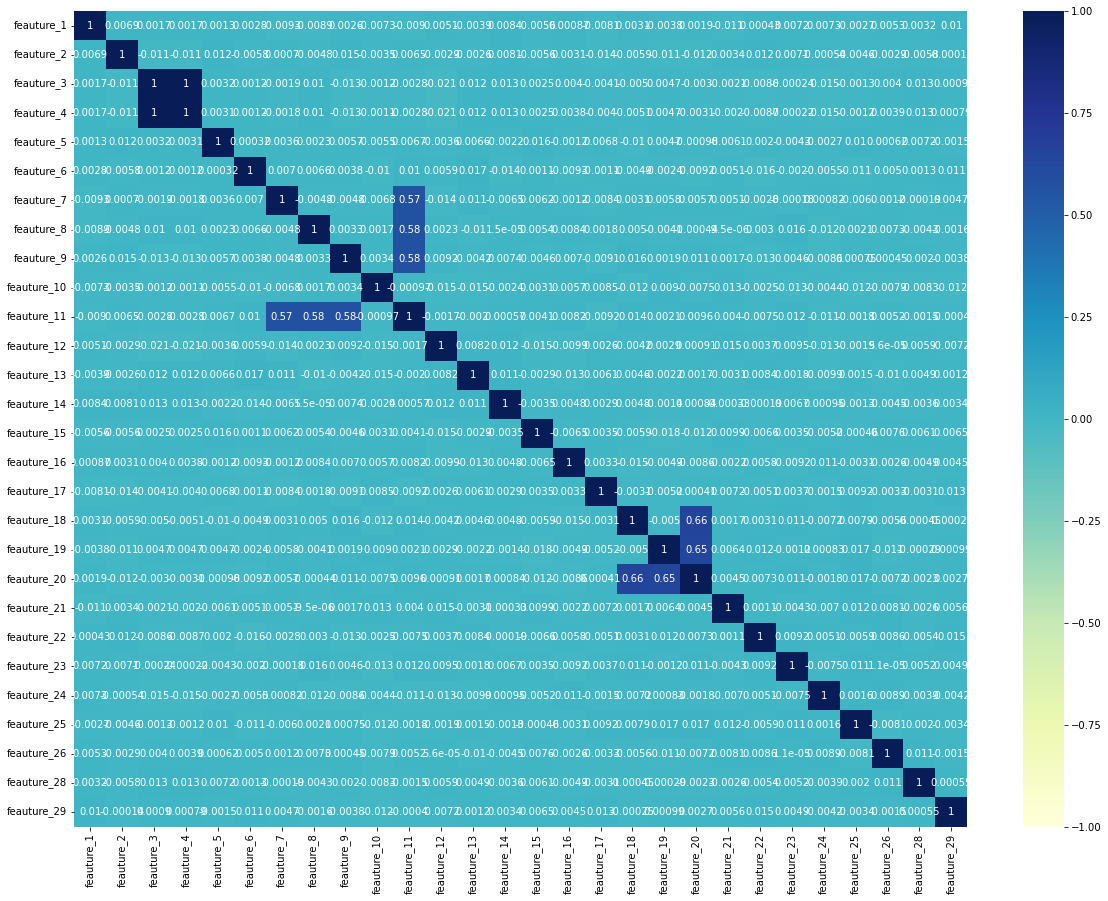

In [180]:

_, ax = plt.subplots(figsize=(20, 15))
#YlGnBu
#coolwarm
sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap='YlGnBu', annot=True, ax=ax)

<h6>Observations:</h6>
<ul>
    <li>from above correlation plot among feautures we can see that feauture_3 and feauture_4 are highly correlated so we can drop feauture_3 or feature_4</li>
    <li>feauture_11 and feature_7 are partially correlated</li>
</ul>

In [181]:
print(X.shape)
X.drop_duplicates()
print(X.shape)

(17915, 29)
(17915, 29)


<b>from above results we can observe that there are no duplicate records present in dataset</b>

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [293]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.18)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.18)

In [227]:
train_df.shape

(12045, 29)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [183]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 12045
Number of data points in test data: 3225
Number of data points in cross validation data: 2645


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

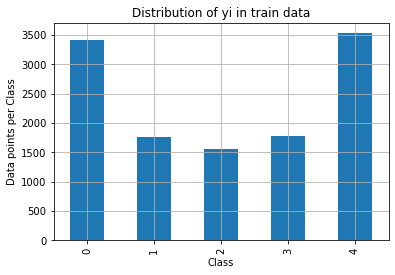

Number of data points in class 4 : 3529 ( 29.298 %)
Number of data points in class 0 : 3415 ( 28.352 %)
Number of data points in class 3 : 1783 ( 14.803 %)
Number of data points in class 1 : 1768 ( 14.678 %)
Number of data points in class 2 : 1550 ( 12.868 %)
--------------------------------------------------------------------------------


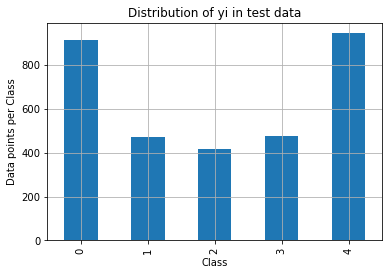

Number of data points in class 4 : 945 ( 29.302 %)
Number of data points in class 0 : 915 ( 28.372 %)
Number of data points in class 3 : 477 ( 14.791 %)
Number of data points in class 1 : 473 ( 14.667 %)
Number of data points in class 2 : 415 ( 12.868 %)
--------------------------------------------------------------------------------


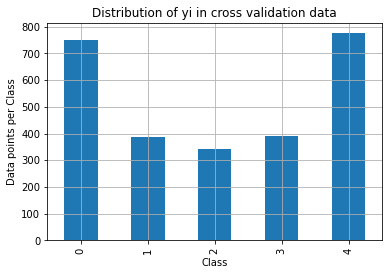

Number of data points in class 4 : 775 ( 29.301 %)
Number of data points in class 0 : 750 ( 28.355 %)
Number of data points in class 3 : 391 ( 14.783 %)
Number of data points in class 1 : 388 ( 14.669 %)
Number of data points in class 2 : 341 ( 12.892 %)


In [184]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the FIVE class probabilites randomly such that they sum to 1. </p>

In [185]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1,2,3,4]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 1.8729162142980202
Log loss on Test Data using Random Model 1.888171659206569
-------------------- Confusion matrix --------------------


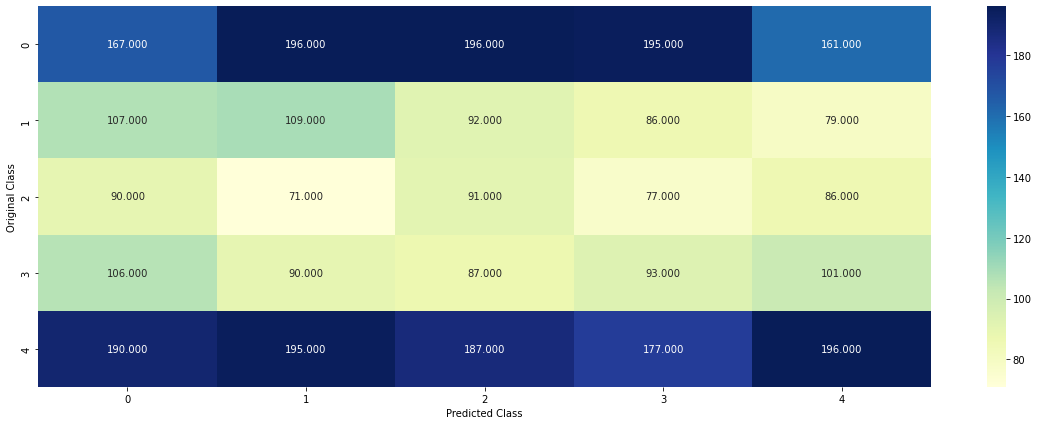

-------------------- Precision matrix (Columm Sum=1) --------------------


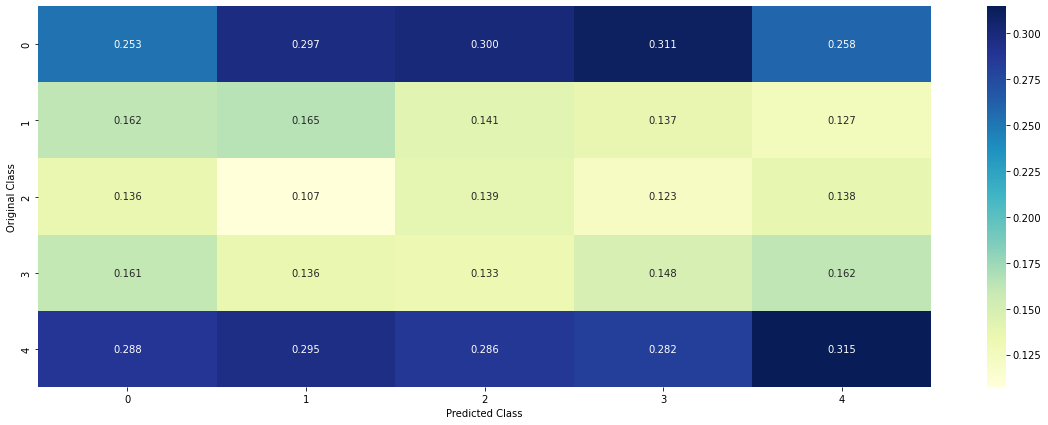

-------------------- Recall matrix (Row sum=1) --------------------


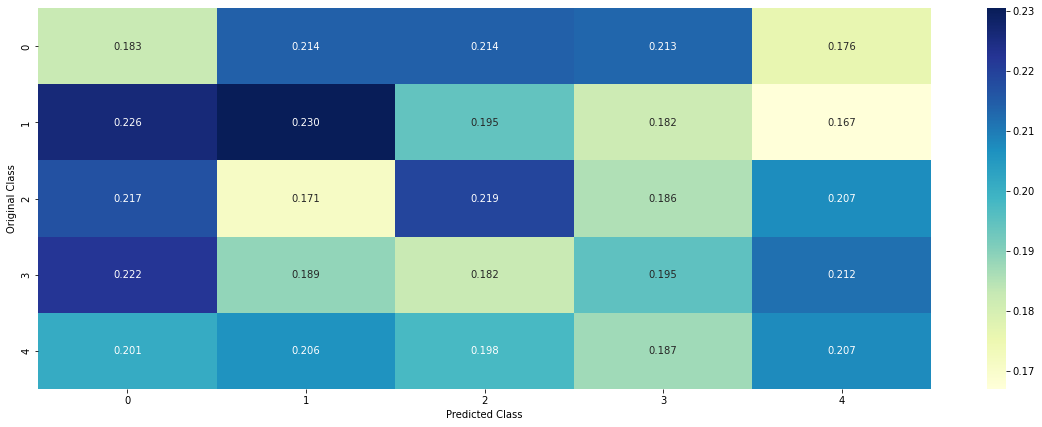

In [186]:
# we need to generate 5 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,5))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,5)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,5))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,5)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [194]:
# one-hot encoding of feauture_27 feature.
from sklearn.preprocessing import OneHotEncoder
feauture_27_vectorizer = OneHotEncoder()
train_feauture_27_onehotCoding = feauture_27_vectorizer.fit_transform(np.array(train_df['feauture_27']).reshape(-1,1))
test_feauture_27_onehotCoding = feauture_27_vectorizer.transform(np.array(test_df['feauture_27']).reshape(-1,1))
cv_feauture_27_onehotCoding = feauture_27_vectorizer.transform(np.array(cv_df['feauture_27']).reshape(-1,1))

In [199]:
feauture_27_vectorizer.get_feature_names()

array(['x0_Cold', 'x0_Hot', 'x0_Very Cold', 'x0_Very Hot'], dtype=object)

In [200]:
print("train_feature_27_onehotCoding is converted feature using one-hot encoding method. The shape of feauture_27 feature:", train_feauture_27_onehotCoding.shape)

train_feature_27_onehotCoding is converted feature using one-hot encoding method. The shape of feauture_27 feature: (12045, 4)


In [208]:
train_feauture_27_onehotCoding_frame=pd.DataFrame(train_feauture_27_onehotCoding.toarray(),columns=feauture_27_vectorizer.get_feature_names())
test_feauture_27_onehotCoding_frame=pd.DataFrame(test_feauture_27_onehotCoding.toarray(),columns=feauture_27_vectorizer.get_feature_names())
cv_feauture_27_onehotCoding_frame=pd.DataFrame(cv_feauture_27_onehotCoding.toarray(),columns=feauture_27_vectorizer.get_feature_names())
print(train_feauture_27_onehotCoding_frame.head())
print("==========================================")
print(test_feauture_27_onehotCoding_frame.head())
print("==========================================")
print(cv_feauture_27_onehotCoding_frame.head())
print("==========================================")

   x0_Cold  x0_Hot  x0_Very Cold  x0_Very Hot
0      0.0     1.0           0.0          0.0
1      0.0     0.0           1.0          0.0
2      0.0     0.0           0.0          1.0
3      0.0     1.0           0.0          0.0
4      0.0     0.0           1.0          0.0
   x0_Cold  x0_Hot  x0_Very Cold  x0_Very Hot
0      0.0     0.0           0.0          1.0
1      0.0     1.0           0.0          0.0
2      0.0     0.0           0.0          1.0
3      0.0     1.0           0.0          0.0
4      0.0     0.0           0.0          1.0
   x0_Cold  x0_Hot  x0_Very Cold  x0_Very Hot
0      0.0     1.0           0.0          0.0
1      1.0     0.0           0.0          0.0
2      0.0     1.0           0.0          0.0
3      0.0     1.0           0.0          0.0
4      1.0     0.0           0.0          0.0


# hstack input feautures

In [294]:
train_df=pd.concat([train_df.reset_index(drop=True),train_feauture_27_onehotCoding_frame.reset_index(drop=True)],axis=1)
test_df=pd.concat([test_df.reset_index(drop=True),test_feauture_27_onehotCoding_frame.reset_index(drop=True)],axis=1)
cv_df=pd.concat([cv_df.reset_index(drop=True),cv_feauture_27_onehotCoding_frame.reset_index(drop=True)],axis=1)

# Dropping feauture_27

In [295]:
train_df=train_df.drop(columns=['feauture_27'])
test_df=test_df.drop(columns=['feauture_27'])
cv_df=cv_df.drop(columns=['feauture_27'])

In [296]:
print("(number of data points * number of features) in train data = ", train_df.shape)
print("(number of data points * number of features) in test data = ", test_df.shape)
print("(number of data points * number of features) in cross validation data =", cv_df.shape)

(number of data points * number of features) in train data =  (12045, 32)
(number of data points * number of features) in test data =  (3225, 32)
(number of data points * number of features) in cross validation data = (2645, 32)


<h1>4. Machine Learning Models</h1>

In [291]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

<h2>4.1. Base Line Model</h2>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.5369279104941118
for alpha = 0.0001
Log Loss : 1.536927910498923
for alpha = 0.001
Log Loss : 1.536927910547057
for alpha = 0.1
Log Loss : 1.5369279161407028
for alpha = 1
Log Loss : 1.5369279945882826
for alpha = 10
Log Loss : 1.5369315274059863
for alpha = 100
Log Loss : 1.537207266478259
for alpha = 1000
Log Loss : 1.5383806887401614


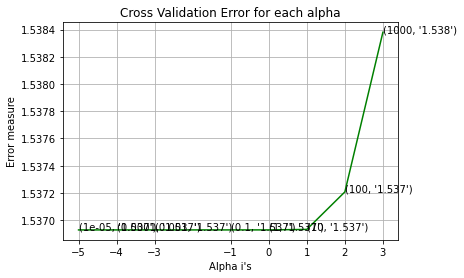

For values of best alpha =  1e-05 The train log loss is: 1.5380837474727278
For values of best alpha =  1e-05 The cross validation log loss is: 1.5369279104941118
For values of best alpha =  1e-05 The test log loss is: 1.538237542059278


In [297]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)


predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.5369279104941118
Number of missclassified point : 0.6744801512287335
-------------------- Confusion matrix --------------------


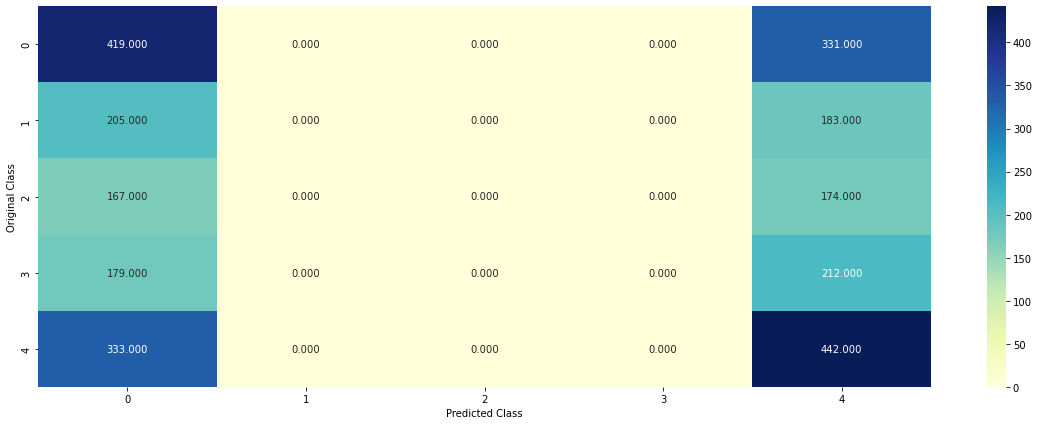

-------------------- Precision matrix (Columm Sum=1) --------------------


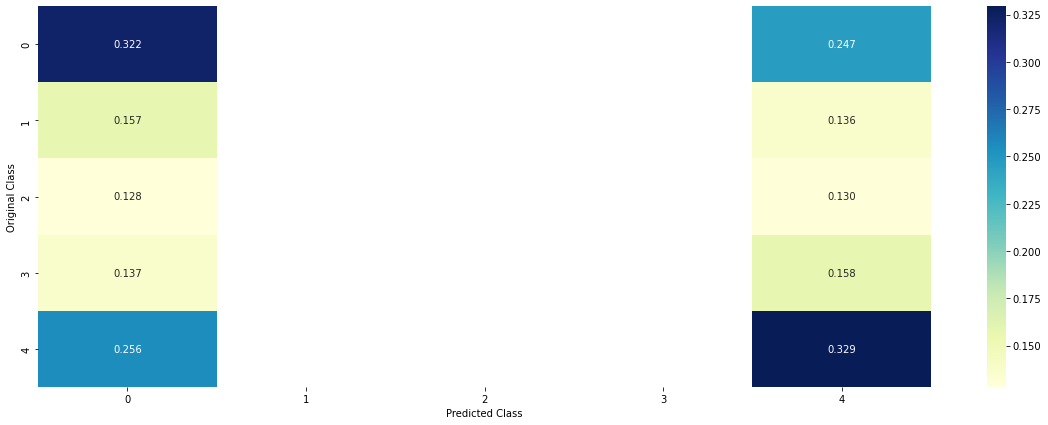

-------------------- Recall matrix (Row sum=1) --------------------


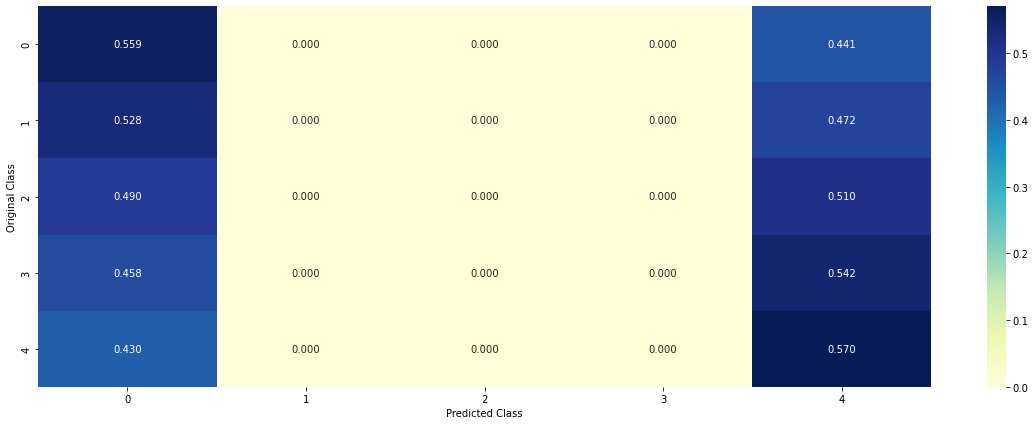

In [298]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)
sig_clf_probs = sig_clf.predict_proba(cv_df)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_cv, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_df)- y_cv))/y_cv.shape[0])
plot_confusion_matrix(y_cv, sig_clf.predict(cv_df))

In [300]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df=scaler.fit_transform(train_df)
test_df=scaler.transform(test_df)
cv_df=scaler.transform(cv_df)

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.3754961286981242
for alpha = 11
Log Loss : 1.3194437251844067
for alpha = 15
Log Loss : 1.3024366690143945
for alpha = 21
Log Loss : 1.2784517730762952
for alpha = 31
Log Loss : 1.2587036292113427
for alpha = 41
Log Loss : 1.2521503397272458
for alpha = 51
Log Loss : 1.2458889209724195
for alpha = 99
Log Loss : 1.2251979442862249


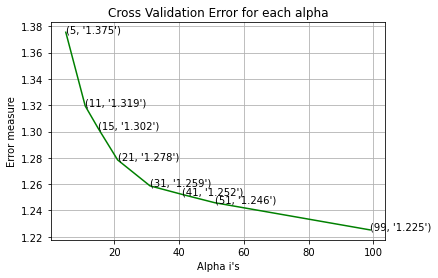

For values of best alpha =  99 The train log loss is: 1.184653758456977
For values of best alpha =  99 The cross validation log loss is: 1.2251979442862249
For values of best alpha =  99 The test log loss is: 1.2103295566704186


In [301]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.2251979442862249
Number of mis-classified points : 0.4321361058601134
-------------------- Confusion matrix --------------------


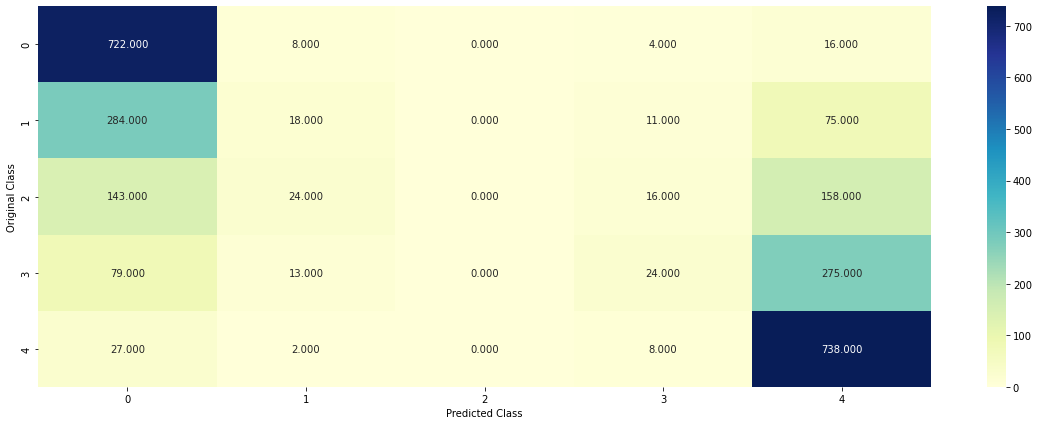

-------------------- Precision matrix (Columm Sum=1) --------------------


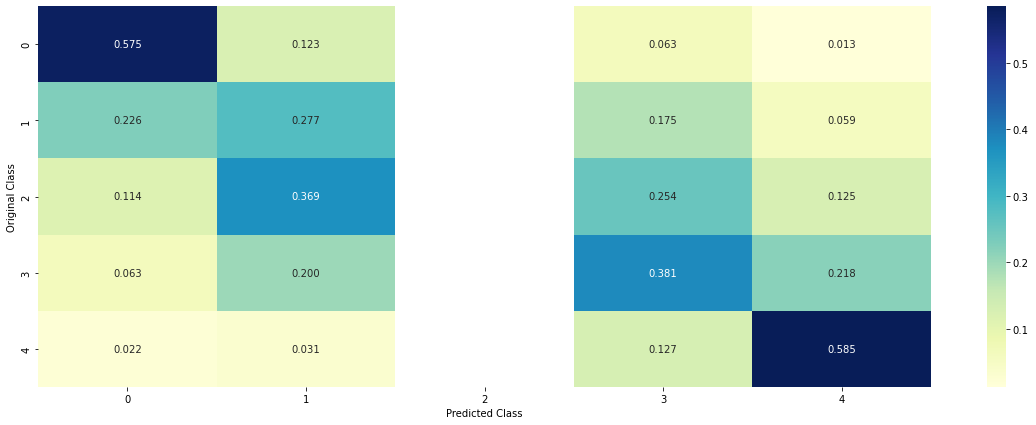

-------------------- Recall matrix (Row sum=1) --------------------


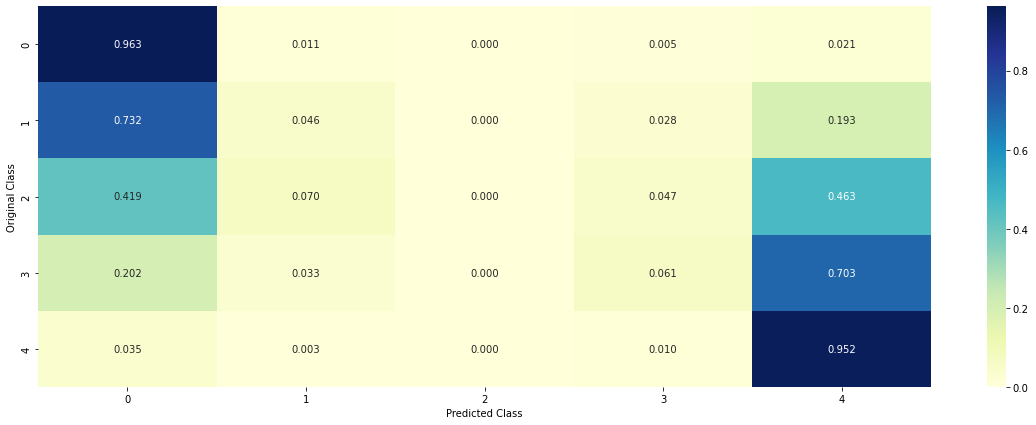

In [302]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [306]:
type(test_df)

numpy.ndarray

In [311]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

test_point_index = 0
predicted_cls = sig_clf.predict(test_df[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_test.iloc[test_point_index])
neighbors = clf.kneighbors(test_df[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",y_train.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_train.iloc[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 1
The  99  nearest neighbours of the test points belongs to classes 1412     0
7889     4
5154     2
17017    4
15797    1
        ..
685      0
5452     4
2598     0
15008    4
2606     4
Name: class, Length: 99, dtype: int64
Fequency of nearest points : Counter({4: 34, 0: 21, 1: 17, 3: 15, 2: 12})


<h3>4.2.4. Sample Query Point-2 </h3>

In [312]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

test_point_index = 100
predicted_cls = sig_clf.predict(test_df[100].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_test.iloc[test_point_index])
neighbors = clf.kneighbors(test_df[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",y_train.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_train.iloc[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 4
The  99  nearest neighbours of the test points belongs to classes 15308    0
17591    4
13348    0
7405     4
2083     4
        ..
3113     4
14712    2
792      1
11219    1
10378    0
Name: class, Length: 99, dtype: int64
Fequency of nearest points : Counter({4: 33, 0: 20, 3: 19, 1: 14, 2: 13})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3510401601185118
for alpha = 1e-05
Log Loss : 1.2575020951274796
for alpha = 0.0001
Log Loss : 1.214950646824995
for alpha = 0.001
Log Loss : 1.1901622752951186
for alpha = 0.01
Log Loss : 1.1820071672772312
for alpha = 0.1
Log Loss : 1.1860678498035104
for alpha = 1
Log Loss : 1.20728357182374
for alpha = 10
Log Loss : 1.2202239523495328
for alpha = 100
Log Loss : 1.2226103407747104


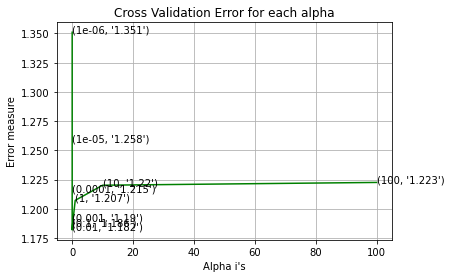

For values of best alpha =  0.01 The train log loss is: 1.1595666783046998
For values of best alpha =  0.01 The cross validation log loss is: 1.1820071672772312
For values of best alpha =  0.01 The test log loss is: 1.1698377849731927


In [314]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1820071672772312
Number of mis-classified points : 0.4325141776937618
-------------------- Confusion matrix --------------------


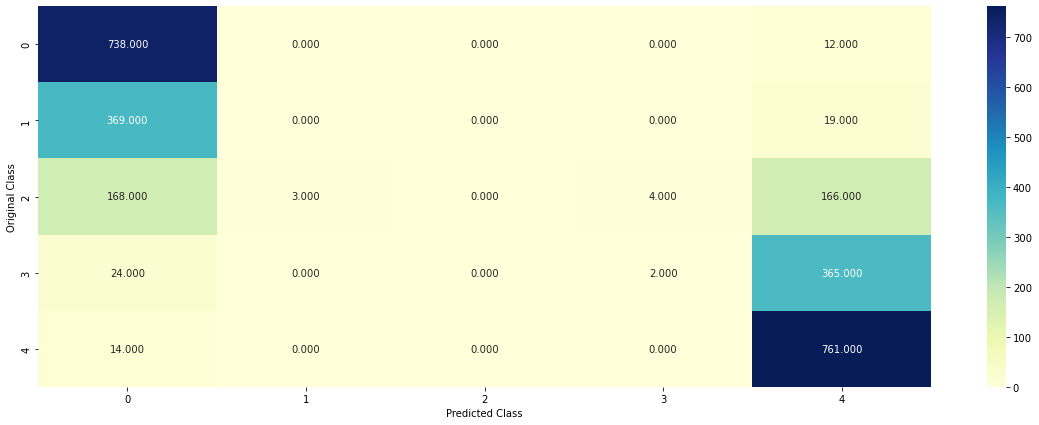

-------------------- Precision matrix (Columm Sum=1) --------------------


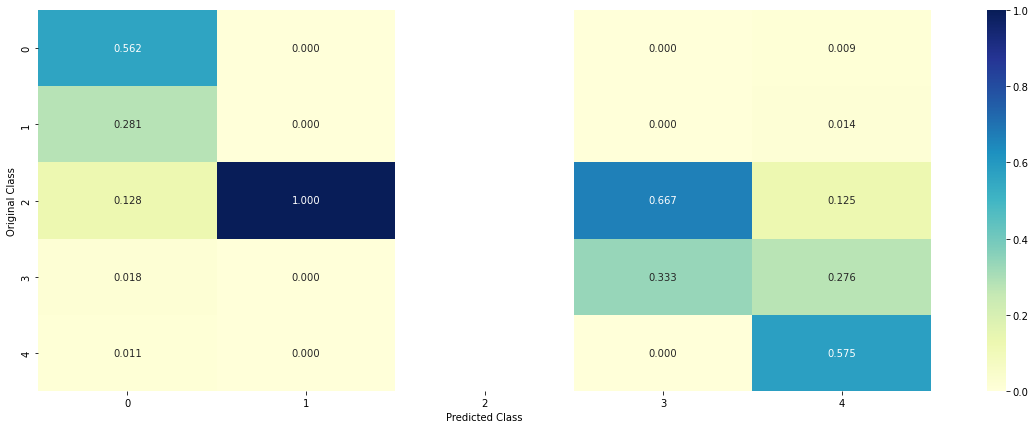

-------------------- Recall matrix (Row sum=1) --------------------


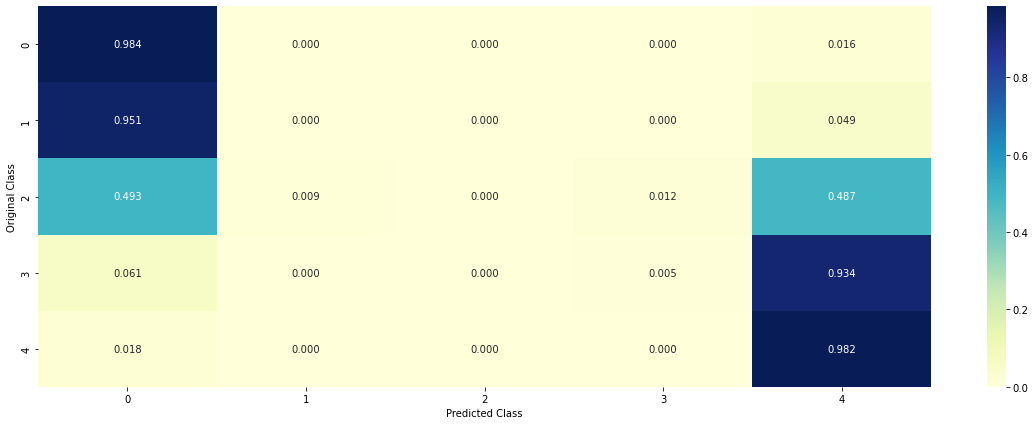

In [315]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning </h3>

In [316]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2511747984839068
for n_estimators = 100 and max depth =  10
Log Loss : 1.19694233542821
for n_estimators = 200 and max depth =  5
Log Loss : 1.2453426587640435
for n_estimators = 200 and max depth =  10
Log Loss : 1.185304935654525
for n_estimators = 500 and max depth =  5
Log Loss : 1.2439835415410185
for n_estimators = 500 and max depth =  10
Log Loss : 1.1796488875053603
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2435399880697373
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1778109224299254
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2444553256340942
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1769228108344907
For values of best estimator =  2000 The train log loss is: 0.5513517579033368
For values of best estimator =  2000 The cross validation log loss is: 1.1769228108344907
For values of best estimator =  2000 The test log loss is: 1.170492394683793


<h3>4.5.2. Testing model with best hyper parameters </h3>

Log loss : 1.1769228108344907
Number of mis-classified points : 0.43440453686200375
-------------------- Confusion matrix --------------------


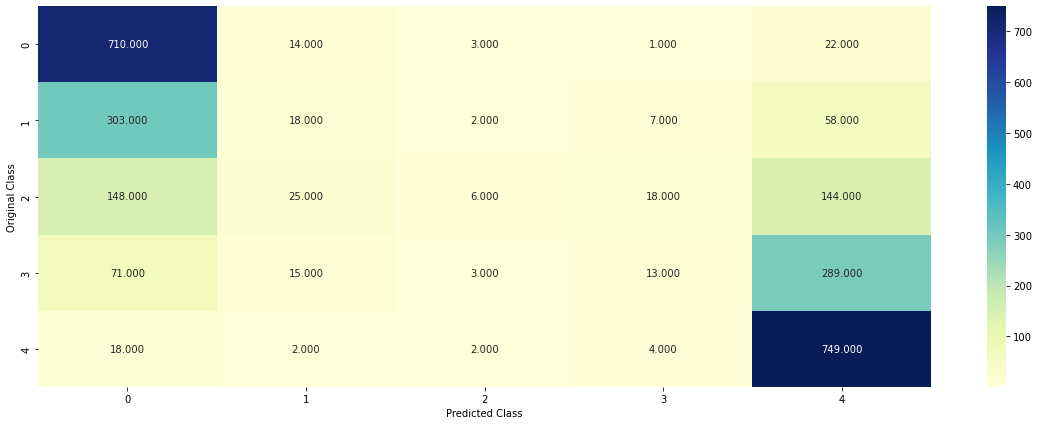

-------------------- Precision matrix (Columm Sum=1) --------------------


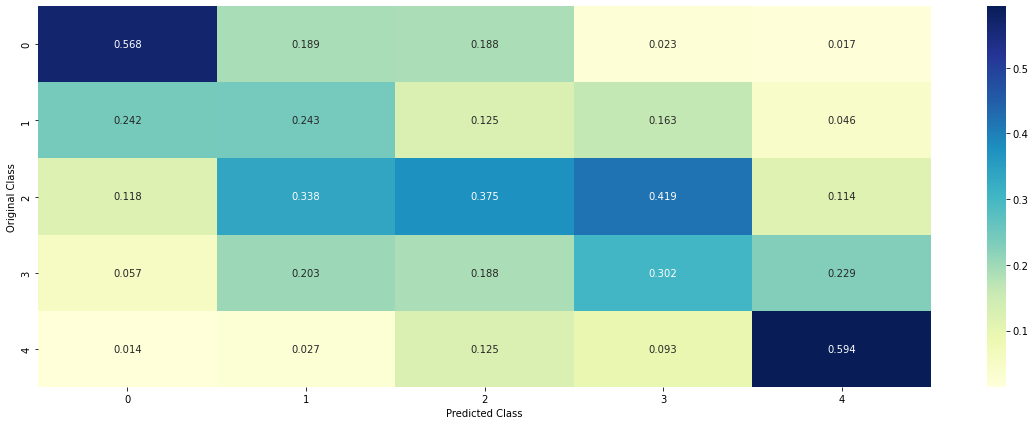

-------------------- Recall matrix (Row sum=1) --------------------


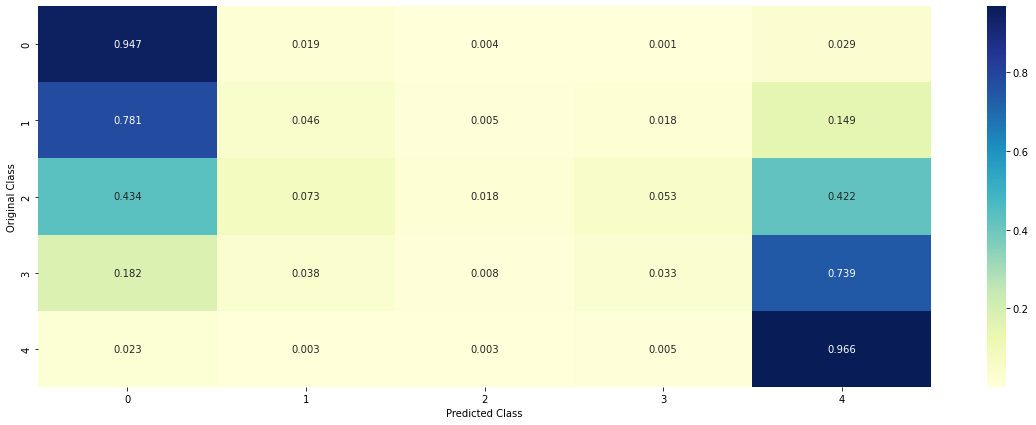

In [317]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

<h2>4.5 XGBoost Classifier</h2>

In [321]:
# !pip install xgboost
from xgboost import XGBClassifier


alpha = [100,200,500,1000,2000]
max_depth = [3,5]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = XGBClassifier(n_estimators=i, max_depth=j, n_jobs=-1)
        clf.fit(train_df, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = XGBClassifier(n_estimators=alpha[int(best_alpha/2)], max_depth=max_depth[int(best_alpha%2)],  n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  3
Log Loss : 1.140172043934655
for n_estimators = 100 and max depth =  5
Log Loss : 1.163428350044332
for n_estimators = 200 and max depth =  3
Log Loss : 1.1392610665103784
for n_estimators = 200 and max depth =  5
Log Loss : 1.161469153150574
for n_estimators = 500 and max depth =  3
Log Loss : 1.1690797757475613
for n_estimators = 500 and max depth =  5
Log Loss : 1.1405211977312697
for n_estimators = 1000 and max depth =  3
Log Loss : 1.182993889577155
for n_estimators = 1000 and max depth =  5
Log Loss : 1.139297656039097
for n_estimators = 2000 and max depth =  3
Log Loss : 1.1855492516810038
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1461837373980424
For values of best estimator =  200 The train log loss is: 0.8124492322042071
For values of best estimator =  200 The cross validation log loss is: 1.1392610665103784
For values of best estimator =  200 The test log loss is: 1.1309131258454248


Log loss : 1.1392610665103784
Number of mis-classified points : 0.40415879017013234
-------------------- Confusion matrix --------------------


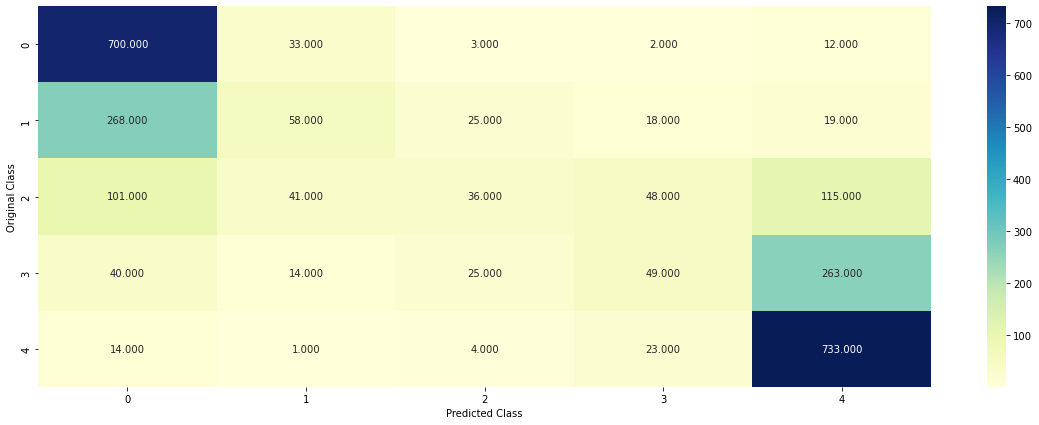

-------------------- Precision matrix (Columm Sum=1) --------------------


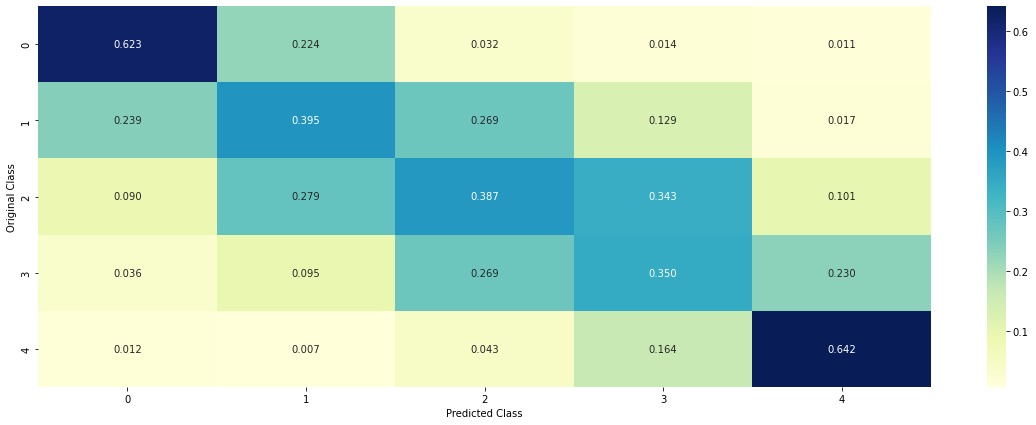

-------------------- Recall matrix (Row sum=1) --------------------


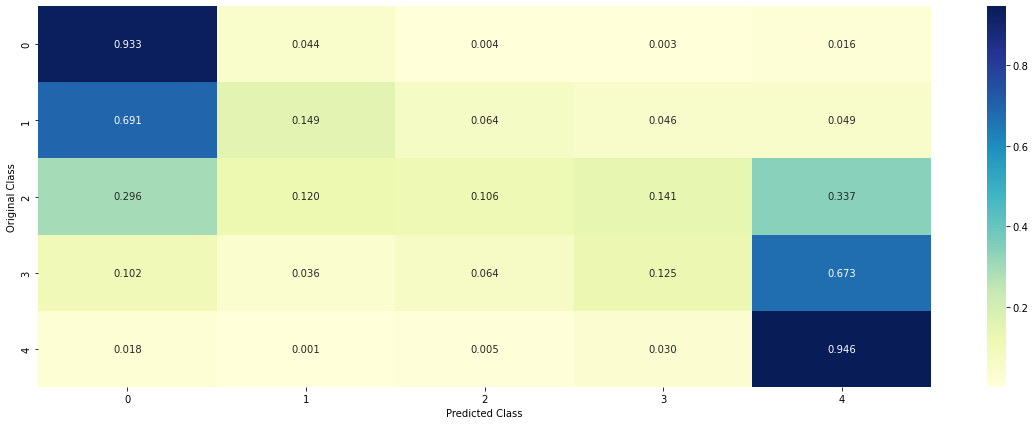

In [322]:
clf = XGBClassifier(n_estimators=alpha[int(best_alpha/2)],  max_depth=max_depth[int(best_alpha%2)],  n_jobs=-1)
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

# Over Sampling

In [323]:
oversample = SMOTE()
train_data_smote, y_train_smote = oversample.fit_resample(train_df, y_train)
# Counter(y_train_smote)

Log loss : 1.235996638910245
Number of mis-classified points : 0.500945179584121
-------------------- Confusion matrix --------------------


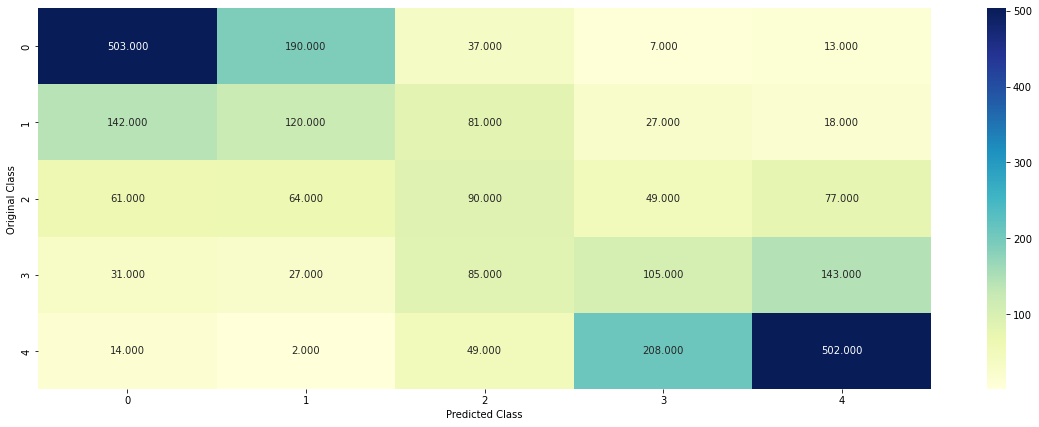

-------------------- Precision matrix (Columm Sum=1) --------------------


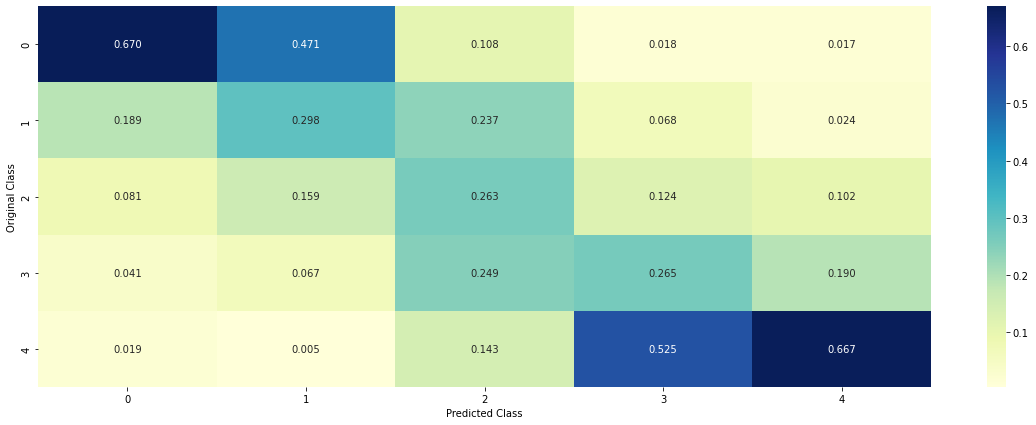

-------------------- Recall matrix (Row sum=1) --------------------


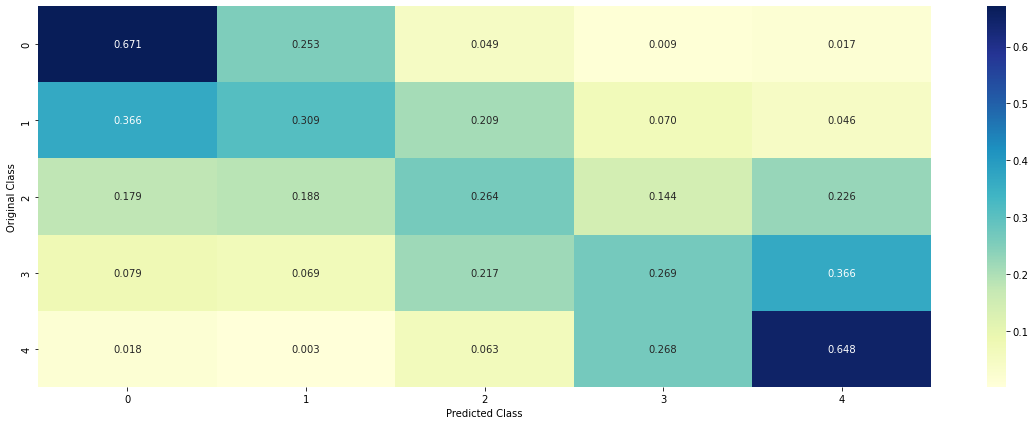

In [326]:
clf = XGBClassifier(n_estimators=alpha[int(best_alpha/2)],  max_depth=max_depth[int(best_alpha%2)],  n_jobs=-1)
predict_and_plot_confusion_matrix(train_data_smote, y_train_smote,cv_df,y_cv, clf)

# Under Sampling

In [327]:
from imblearn.under_sampling import RandomUnderSampler 


undersample = RandomUnderSampler()
train_data_under, y_train_under = undersample.fit_resample(train_df, y_train)
# Counter(y_train_smote)

In [330]:
# !pip install xgboost
from xgboost import XGBClassifier


alpha = [100,200,500,1000,2000]
max_depth = [3,5]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = XGBClassifier(n_estimators=i, max_depth=j, n_jobs=-1)
        clf.fit(train_data_under, y_train_under)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = XGBClassifier(n_estimators=alpha[int(best_alpha/2)], max_depth=max_depth[int(best_alpha%2)],  n_jobs=-1)
clf.fit(train_data_under, y_train_under)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_data_under, y_train_under)

predict_y = sig_clf.predict_proba(train_data_under)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train_under, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



for n_estimators = 100 and max depth =  3
Log Loss : 1.140172043934655
for n_estimators = 100 and max depth =  5
Log Loss : 1.163428350044332
for n_estimators = 200 and max depth =  3
Log Loss : 1.1392610665103784
for n_estimators = 200 and max depth =  5
Log Loss : 1.161469153150574
for n_estimators = 500 and max depth =  3
Log Loss : 1.1690797757475613
for n_estimators = 500 and max depth =  5
Log Loss : 1.1405211977312697
for n_estimators = 1000 and max depth =  3
Log Loss : 1.182993889577155
for n_estimators = 1000 and max depth =  5
Log Loss : 1.139297656039097
for n_estimators = 2000 and max depth =  3
Log Loss : 1.1855492516810038
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1461837373980424
For values of best estimator =  200 The train log loss is: 0.9676249210954834
For values of best estimator =  200 The cross validation log loss is: 1.307419887079215
For values of best estimator =  200 The test log loss is: 1.3012704364342595


Log loss : 1.307419887079215
Number of mis-classified points : 0.4741020793950851
-------------------- Confusion matrix --------------------


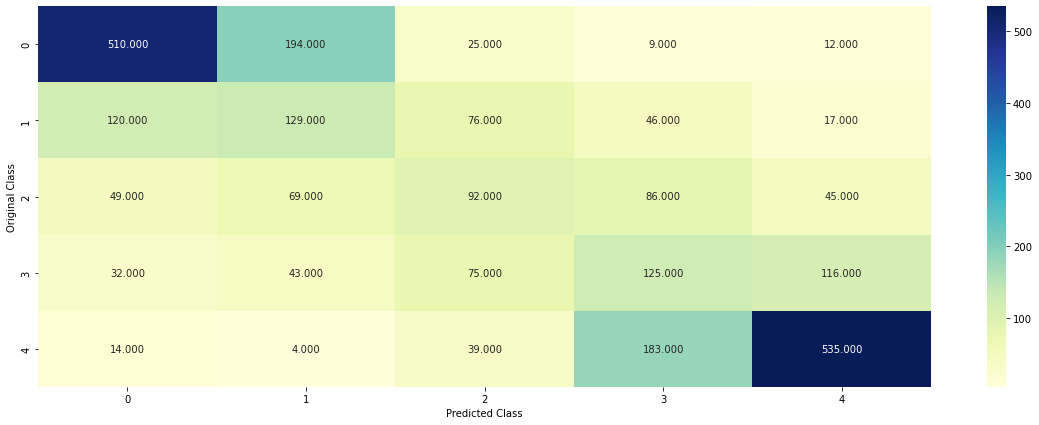

-------------------- Precision matrix (Columm Sum=1) --------------------


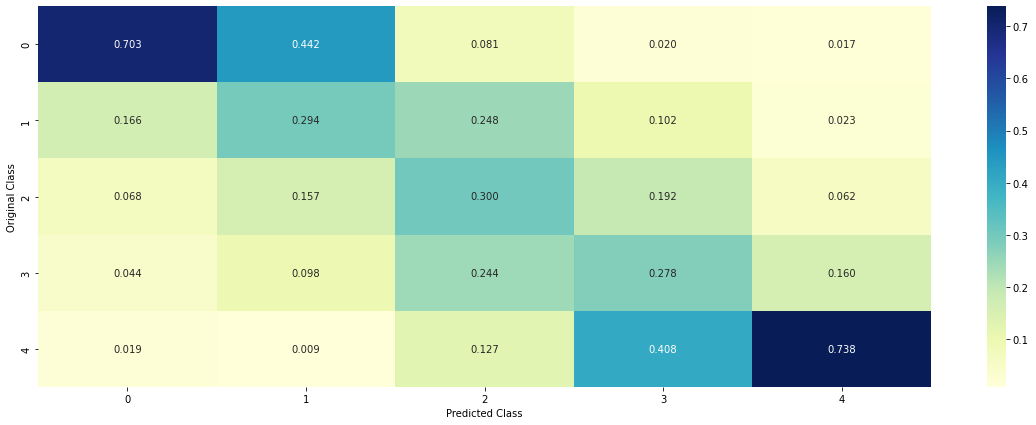

-------------------- Recall matrix (Row sum=1) --------------------


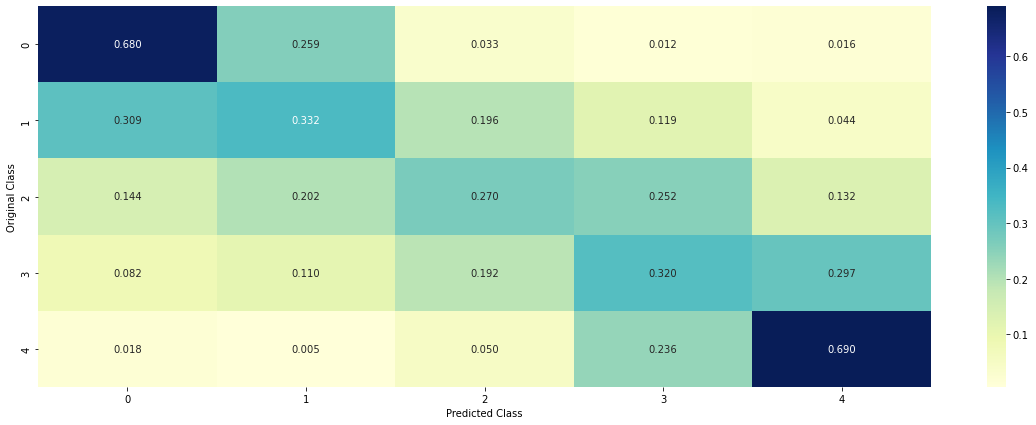

In [331]:
clf = XGBClassifier(n_estimators=alpha[int(best_alpha/2)],  max_depth=max_depth[int(best_alpha%2)],  n_jobs=-1)
predict_and_plot_confusion_matrix(train_data_under, y_train_under,cv_df,y_cv, clf)


<b>Observations</b>
<li>Among all the models XGBClassifier has very good logloss</li>
<li>I have tried  oversampling or undersampling techniques to improve logloss but logloss hasnt improved</li>
<li>as percentage of outliers and null values are less than 0.5 % I have removed those datapoints ,else we can use mean or medium imputation techniques to fill null values</li>